# Python/AIML Project: AllLife Bank Data Analysis

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [1]:
# import all necessary libraries and modules used for data analysis

# read and manipulate data
import pandas as pd
import numpy as np

# create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# split data into training and testing sets
from sklearn.model_selection import train_test_split

# build prediction model using decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# get performance metrics for model
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# stop extra warnings from showing
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# read csv file into pandas dataframe
loan_data = pd.read_csv("/Users/shreyamenon/Documents/Loan_Modelling.csv")  # file path

# make a copy of loan_data to avoid changes to original
data_copy = loan_data.copy()

## Data Overview

In [8]:
# get a general idea of what data set looks like with these functions

# get shape of data
print("Shape of the data: ", data_copy.shape)
print() # new line for readability

# view datatypes of each column in data
print("Data types of each column: ")
print(data_copy.dtypes)
print()

# print statistical summary of data
print("Statistical summary: ")
print(data_copy.describe().T)
print()

# view first 5 rows of data
print("First 5 rows: ")
print(data_copy.head())
print()

# view last 5 rows of data
print("Last 5 rows: ")
print(data_copy.tail())
print()

Shape of the data:  (5000, 14)

Data types of each column: 
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

Statistical summary: 
                     count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0 

## Exploratory Data Analysis.

### Univariable Analysis

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64



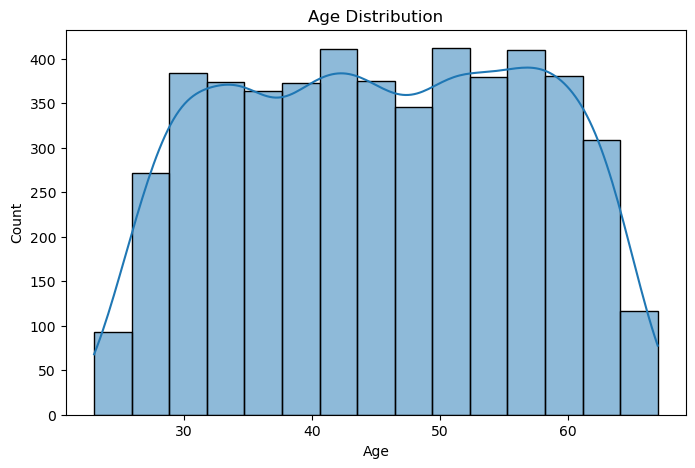

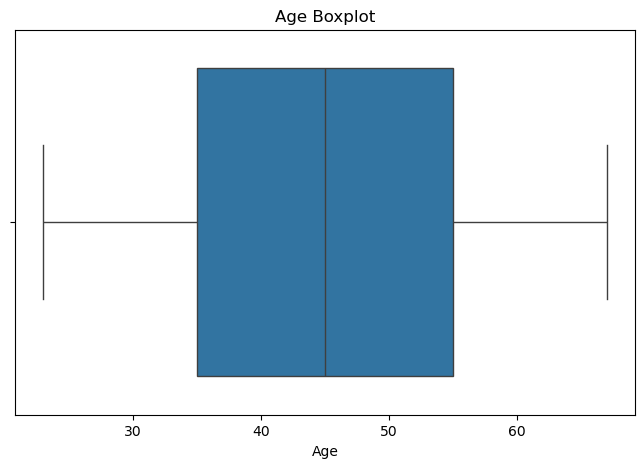

In [14]:
# age variable
# summary statistics for age
print(data_copy["Age"].describe())
print()

# histogram to show age distribution
plt.figure(figsize = (8, 5))
sns.histplot(data_copy["Age"], kde = True, bins = 15)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# boxplot to detect age outliers
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Age")
plt.title("Age Boxplot")
plt.show()

The age of customers is fairly evenly distributed across the range of 25 to 65 years, with no significant peaks or drops in any specific age range. This suggests that the bank's customer base spans a wide variety of ages, without an overrepresentation of any particular group. The boxplot confirms that the age data is well-distributed with no significant outliers. The median age appears close to the center of the age range, suggesting a balanced distribution.

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64



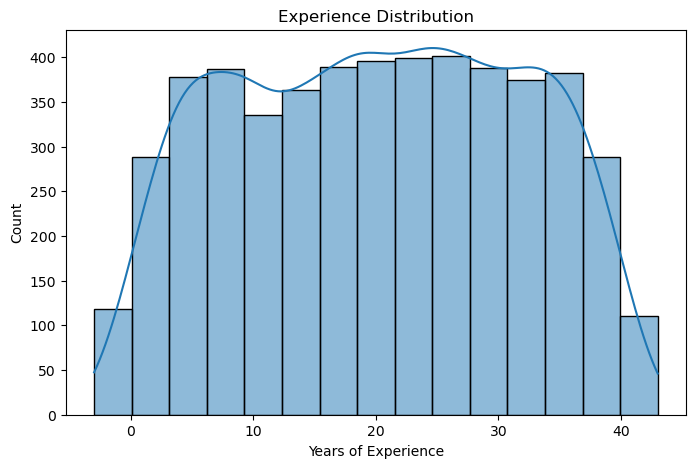

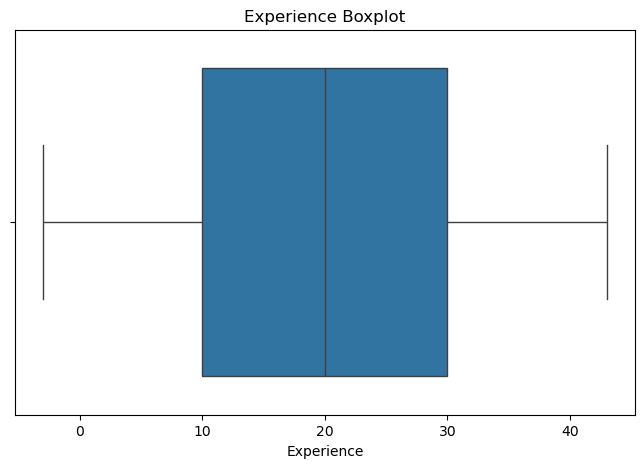

In [17]:
# experience variable
# summary statistics for experience
print(data_copy["Experience"].describe())
print()

# histogram to show experience distribution
plt.figure(figsize = (8, 5))
sns.histplot(data_copy["Experience"], kde = True, bins = 15)
plt.title("Experience Distribution")
plt.xlabel("Years of Experience")
plt.show()

# boxplot to detect experience outliers
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Experience")
plt.title("Experience Boxplot")
plt.show()

The histogram shows that the years of professional experience among customers are evenly distributed across the range from 0 to 40 years, with no significant spikes or gaps. The boxplot reveals that there are no extreme outliers in the experience data, with the interquartile range spanning a large portion of the distribution. The distribution suggests that customers across all experience levels are engaging with the bank's services.

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64



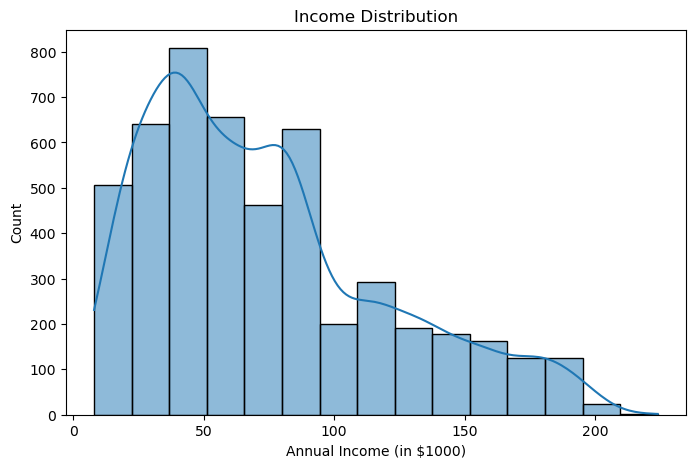

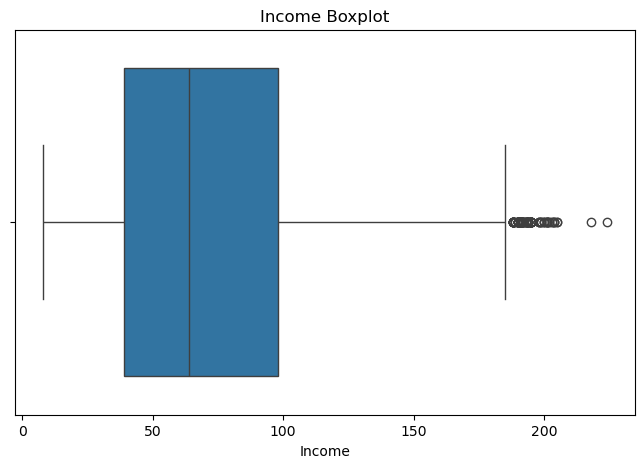

In [20]:
# income variable
# summary statistics for income
print(data_copy["Income"].describe())
print()

# histogram to show income distribution
plt.figure(figsize = (8, 5))
sns.histplot(data_copy["Income"], kde = True, bins = 15)
plt.title("Income Distribution")
plt.xlabel("Annual Income (in $1000)")
plt.show()

# boxplot to detect income outliers
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Income")
plt.title("Income Boxplot")
plt.show()

The histogram shows that the annual income of customers is positively skewed, with most customers earning between 0 and 100,000 dollars annually. A small portion of the customers have significantly higher incomes, which creates the tail on the right side of the distribution. The boxplot confirms the presence of high-income outliers beyond the whiskers of the plot. The data indicates that the bank primarily serves middle-income customers, with a smaller subset of high-income clients. Understanding how loan interest varies across these income groups could help tailor marketing efforts and loan offers to specific segments.

Family
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64



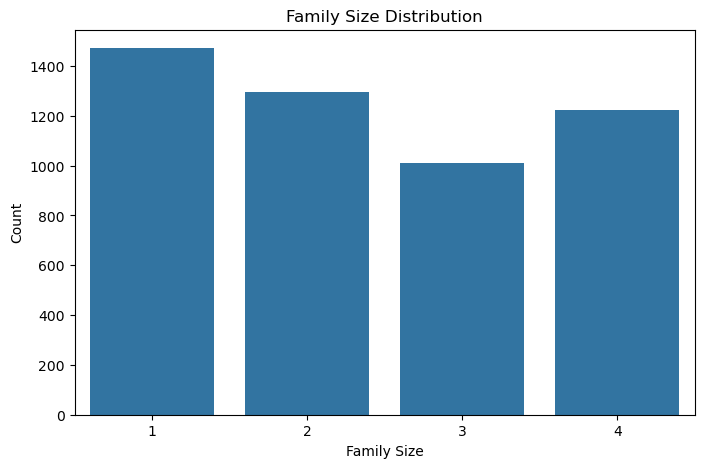

In [23]:
# family variable
# frequency counts for family size
print(data_copy["Family"].value_counts())
print()

# bar plot for family size distribution
plt.figure(figsize = (8, 5))
sns.countplot(data = data_copy, x = "Family")
plt.title("Family Size Distribution")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()

The most common family size among the customers is 1, followed closely by 2 and 4. Family size 3 has slightly fewer customers, but the overall distribution remains relatively balanced across all sizes. The data suggests that marketing strategies or financial products targeting individuals and smaller families may have a broader reach. 

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64



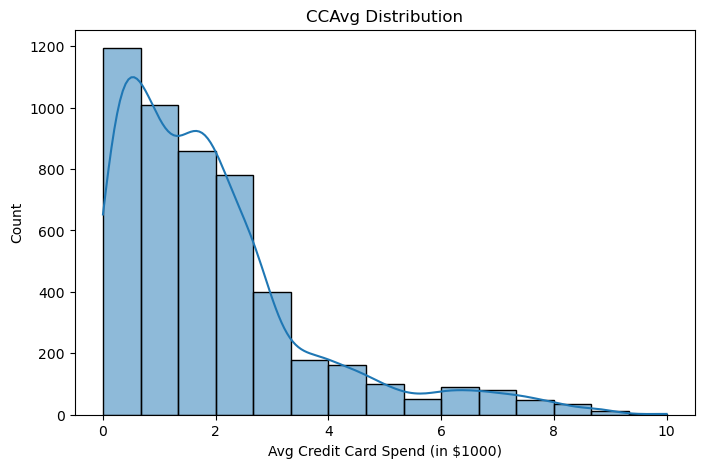

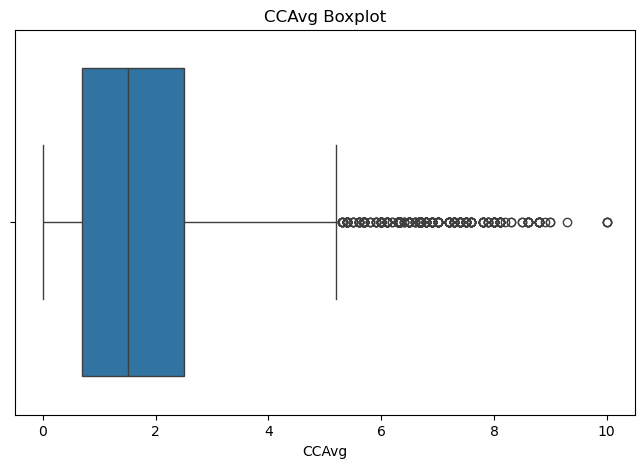

In [26]:
# CC avg variable
# summary statistics for cc avg
print(data_copy["CCAvg"].describe())
print()

# histogram to show cc avg distribution
plt.figure(figsize = (8, 5))
sns.histplot(data_copy["CCAvg"], kde = True, bins = 15)
plt.title("CCAvg Distribution")
plt.xlabel("Avg Credit Card Spend (in $1000)")
plt.show()

# boxplot to detect cc avg outliers
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "CCAvg")
plt.title("CCAvg Boxplot")
plt.show()

The distribution of average monthly credit card spending is highly skewed to the right. Most customers spend between 0 and 2,000 dollars monthly, with significantly fewer customers spending beyond 4,000 dollars. The boxplot highlights a large number of outliers on the higher end, suggesting a small subset of customers with unusually high spending patterns. However, the majority of customers fall below the upper quartile (2,000 dollars). However, targeting this high-spending group for premium credit card offers or financial products could be a strategic opportunity for the bank.

Education
1    2096
3    1501
2    1403
Name: count, dtype: int64



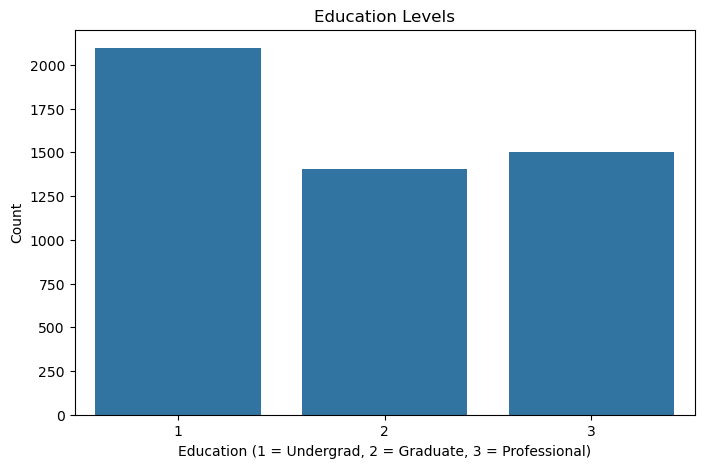

In [29]:
# education variable
# frequency counts for education levels
print(data_copy["Education"].value_counts())
print()

# bar plot for education levels
plt.figure(figsize = (8, 5))
sns.countplot(data = data_copy, x = "Education")
plt.title("Education Levels")
plt.xlabel("Education (1 = Undergrad, 2 = Graduate, 3 = Professional)")
plt.ylabel("Count")
plt.show()

The majority of customers have an undergraduate level of education (category 1), while the number of customers with graduate (category 2) and professional (category 3) education levels is relatively similar but smaller. The distribution of education levels indicates that the bank may benefit from tailoring financial products or campaigns based on educational backgrounds. For example, higher-education groups (graduates and professionals) might be more inclined toward investment or premium financial products.

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64



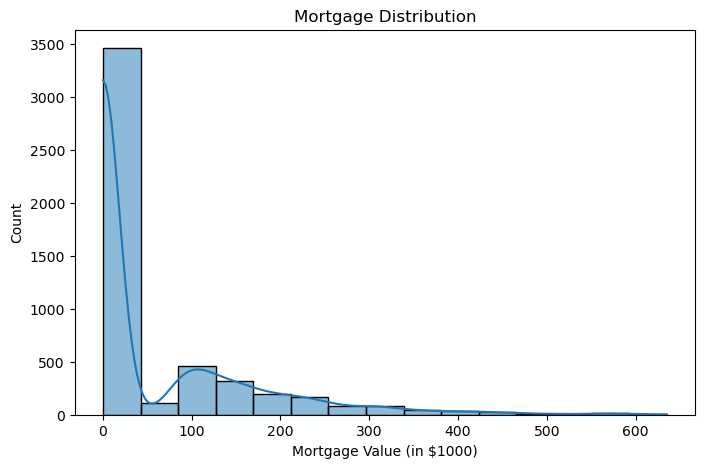

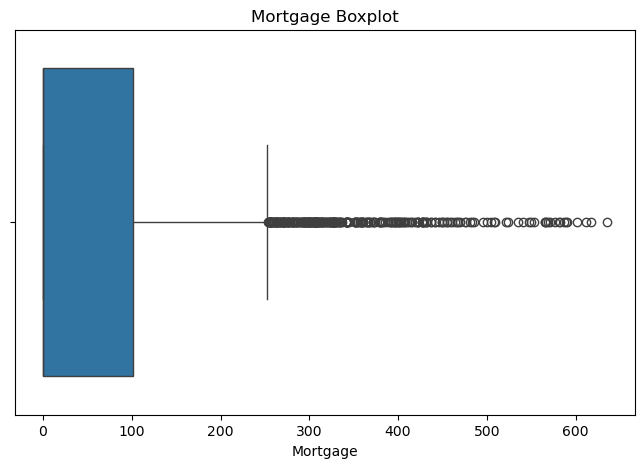

In [32]:
# mortgage variable
# summary statistics for mortgage
print(data_copy["Mortgage"].describe())
print()

# histogram to show mortgage distribution
plt.figure(figsize = (8, 5))
sns.histplot(data_copy["Mortgage"], kde = True, bins = 15)
plt.title("Mortgage Distribution")
plt.xlabel("Mortgage Value (in $1000)")
plt.show()

# boxplot to detect mortgage outliers
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Mortgage")
plt.title("Mortgage Boxplot")
plt.show()

The majority of customers have a mortgage value of 0 dollars, as shown by the large spike at the beginning of the histogram. Beyond 0 dollars, the distribution is positively skewed, with fewer customers having higher mortgage values. Most customers either do not have a mortgage or have relatively small mortgage values. The small subset of customers with higher mortgage values may represent a valuable target group for refinancing or loan-related products.

Personal_Loan
0    4520
1     480
Name: count, dtype: int64



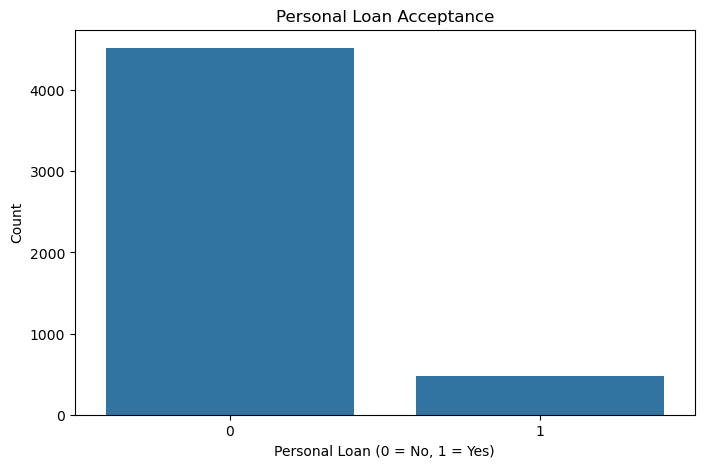

In [35]:
# personal loan variable
# frequency counts for personal loan
print(data_copy["Personal_Loan"].value_counts())
print()

# bar plot for personal loan acceptance
plt.figure(figsize = (8, 5))
sns.countplot(data = data_copy, x = "Personal_Loan")
plt.title("Personal Loan Acceptance")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The majority of customers did not accept the personal loan offered, as shown by the significantly higher count of 0 (No) compared to 1 (Yes). This imbalance suggests that either the personal loan offer did not appeal to most customers or the loan terms were not suitable for the majority of the customer base. Customizing loan offers or better targeting of the interested segment may improve acceptance rates.

Securities_Account
0    4478
1     522
Name: count, dtype: int64



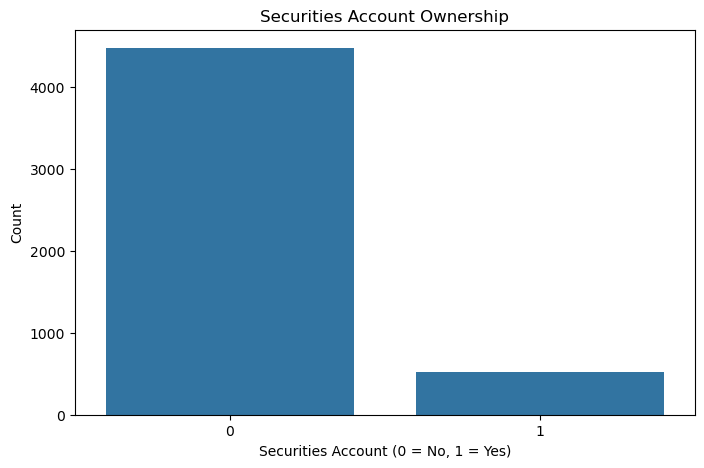

In [38]:
# securities account variable
# frequency counts for securities account
print(data_copy["Securities_Account"].value_counts())
print()

# bar plot for securities account ownership
plt.figure(figsize = (8, 5))
sns.countplot(data = data_copy, x = "Securities_Account")
plt.title("Securities Account Ownership")
plt.xlabel("Securities Account (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The vast majority of customers do not own a securities account, as indicated by the significantly higher count of 0 (No) compared to 1 (Yes). This suggests that securities accounts are not a common product among the bank's customer base, which may indicate a lack of interest, awareness, or accessibility to such accounts. The bank could explore strategies to promote securities accounts, such as educating customers about the benefits of investing or offering incentives to open accounts.

CD_Account
0    4698
1     302
Name: count, dtype: int64



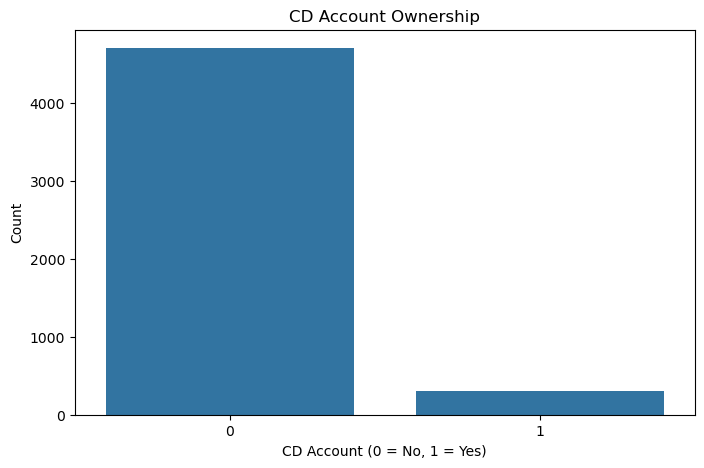

In [41]:
# CD account variable
# frequency counts for cd account
print(data_copy["CD_Account"].value_counts())
print()

# bar plot for cd account ownership
plt.figure(figsize = (8, 5))
sns.countplot(data = data_copy, x = "CD_Account")
plt.title("CD Account Ownership")
plt.xlabel("CD Account (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The majority of customers do not own a certificate of deposit (CD) account, as shown by the significantly higher count of 0 (No) compared to 1 (Yes). This suggests that CD accounts are not a widely adopted financial product among the customer base, which could reflect a lack of interest, unfamiliarity with the product, or an inclination toward other forms of investment. The bank may consider promoting CD accounts more effectively by highlighting their benefits, such as stable returns, or providing incentives for customers to open these accounts.

Online
1    2984
0    2016
Name: count, dtype: int64



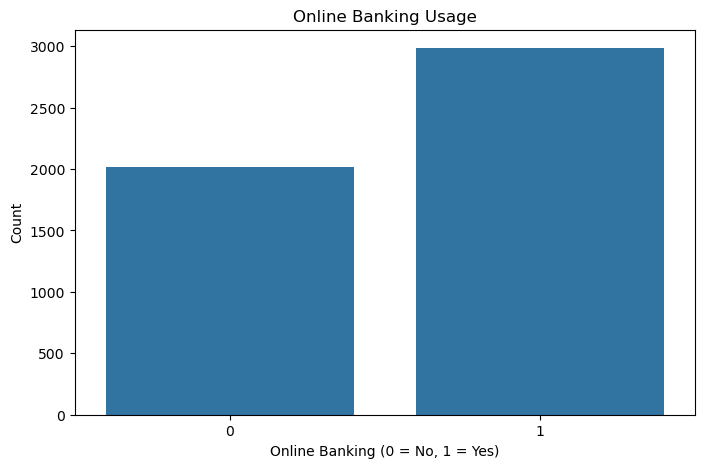

In [44]:
# online variable
# frequency counts for online banking usage
print(data_copy["Online"].value_counts())
print()

# bar plot for online banking usage
plt.figure(figsize = (8, 5))
sns.countplot(data = data_copy, x = "Online")
plt.title("Online Banking Usage")
plt.xlabel("Online Banking (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

A significant portion of customers use online banking services (1 = Yes), with the count of online banking users higher than those who do not use these services (0 = No). The widespread adoption of online banking suggests that a majority of customers prefer digital banking channels, which might reflect convenience, accessibility, or technological familiarity. The bank could further enhance digital banking features or introduce promotions targeted at the remaining non-users to encourage their adoption of online services.

CreditCard
0    3530
1    1470
Name: count, dtype: int64



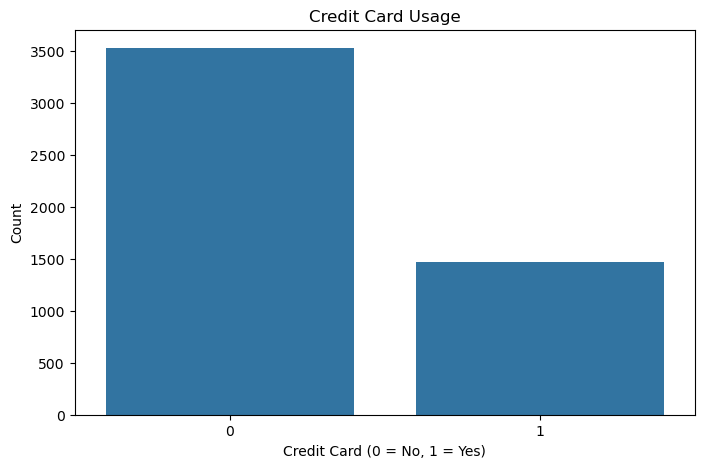

In [47]:
# credit card variable
# frequency counts for credit card usage
print(data_copy["CreditCard"].value_counts())
print()

# bar plot for credit card usage
plt.figure(figsize = (8, 5))
sns.countplot(data = data_copy, x = "CreditCard")
plt.title("Credit Card Usage")
plt.xlabel("Credit Card (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The majority of customers do not use a credit card issued by another bank (0 = No), as indicated by the higher count compared to those who do (1 = Yes). The bank could explore opportunities to convert non-users into credit card customers by promoting its own credit card offerings. Additionally, understanding the reasons for non-usage or targeting existing external credit card users with competitive features could help attract more customers.

### Bivariable Analysis

Average Age by Personal Loan Status: 
                    mean  median  count
Personal_Loan                          
0              45.367257    45.0   4520
1              45.066667    45.0    480
--------------------------------------------------


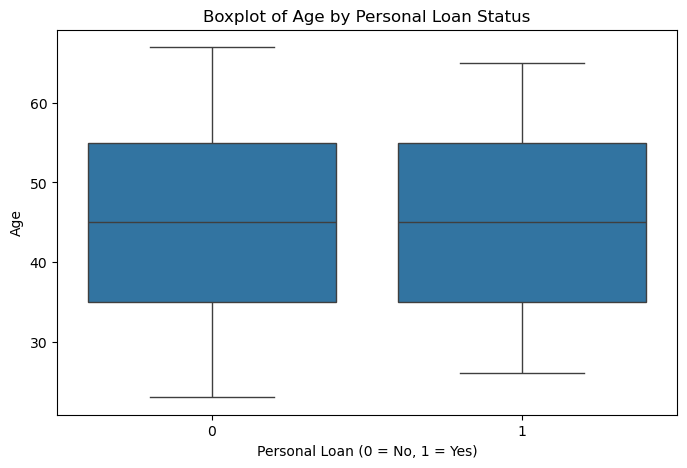

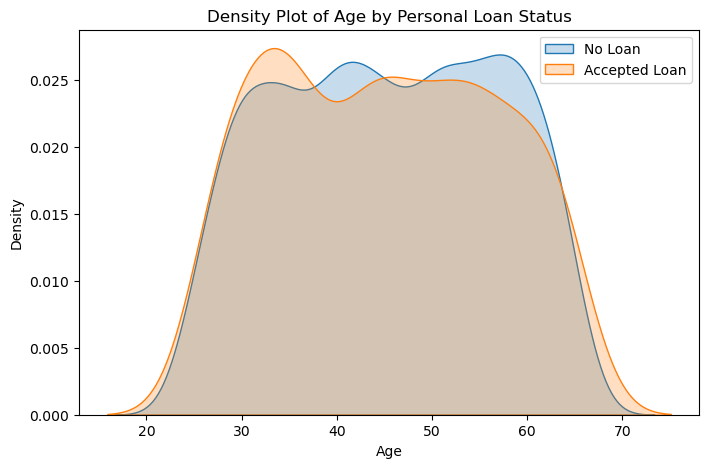

In [51]:
# personal loan vs. age
# group statistics: average age by personal loan status
group_stats = data_copy.groupby("Personal_Loan")["Age"].agg(["mean", "median", "count"])
print("Average Age by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# boxplot to compare age distribution for loan acceptance
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Personal_Loan", y = "Age")
plt.title("Boxplot of Age by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# density plot for age distribution by loan status
plt.figure(figsize = (8, 5))
sns.kdeplot(data = data_copy[data_copy["Personal_Loan"] == 0], x = "Age", label = "No Loan", fill = True)
sns.kdeplot(data = data_copy[data_copy["Personal_Loan"] == 1], x = "Age", label = "Accepted Loan", fill = True)
plt.title("Density Plot of Age by Personal Loan Status")
plt.xlabel("Age")
plt.legend()
plt.show()

The boxplot shows a similar age distribution for both groups of customers (those who accepted and those who did not accept the personal loan). The density plot shows a slightly higher density of younger individuals (ages 30–40) accepting loans compared to older individuals. Customers in the 30–40 age range might be more likely to take loans due to financial needs for major life milestones, such as buying a house or starting a family. On the other hand, older customers might have more financial stability or alternative means to meet their needs, reducing their reliance on loans.

Average Experience by Personal Loan Status: 
                    mean  median  count
Personal_Loan                          
0              20.132301    20.0   4520
1              19.843750    20.0    480
--------------------------------------------------


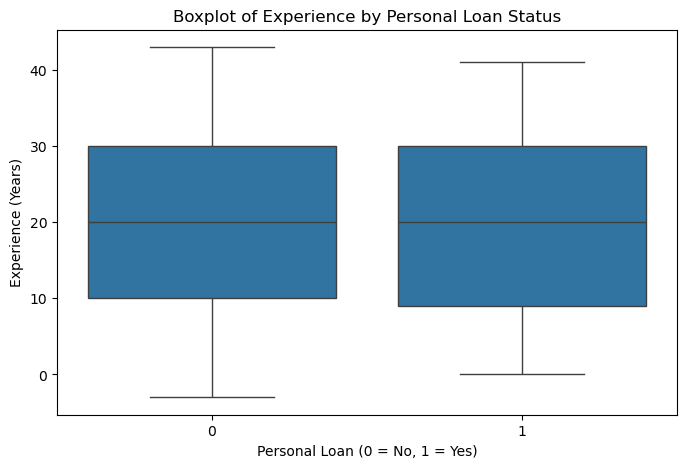

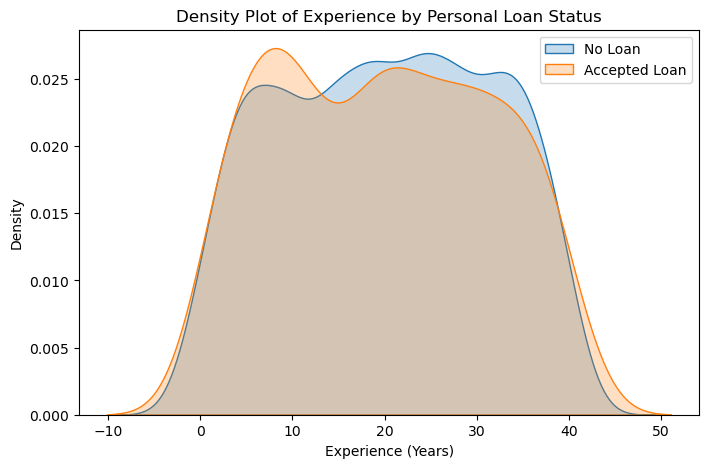

In [54]:
# personal loan vs. experience
# group statistics for experience by personal loan status
group_stats = data_copy.groupby("Personal_Loan")["Experience"].agg(["mean", "median", "count"])
print("Average Experience by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# boxplot to compare experience distribution for loan acceptance
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Personal_Loan", y = "Experience")
plt.title("Boxplot of Experience by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Experience (Years)")
plt.show()

# density plot for experience distribution by loan status
plt.figure(figsize = (8, 5))
sns.kdeplot(data = data_copy[data_copy["Personal_Loan"] == 0], x = "Experience", label = "No Loan", fill = True)
sns.kdeplot(data = data_copy[data_copy["Personal_Loan"] == 1], x = "Experience", label = "Accepted Loan", fill = True)
plt.title("Density Plot of Experience by Personal Loan Status")
plt.xlabel("Experience (Years)")
plt.legend()
plt.show()

The boxplot shows that the distribution of years of experience is very similar between customers who accepted the personal loan (1) and those who did not (0). The density plot further supports this observation, as the distributions of experience for both groups overlap significantly. A possible reason for the lack of variation could be that factors like income or spending behavior (rather than years of professional experience) are more influential in determining whether a customer accepts a loan.

Average Income by Personal Loan Status: 
                     mean  median  count
Personal_Loan                           
0               66.237389    59.0   4520
1              144.745833   142.5    480
--------------------------------------------------


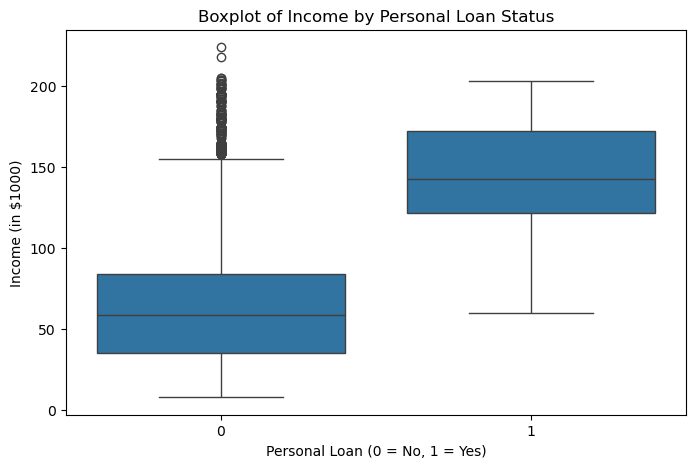

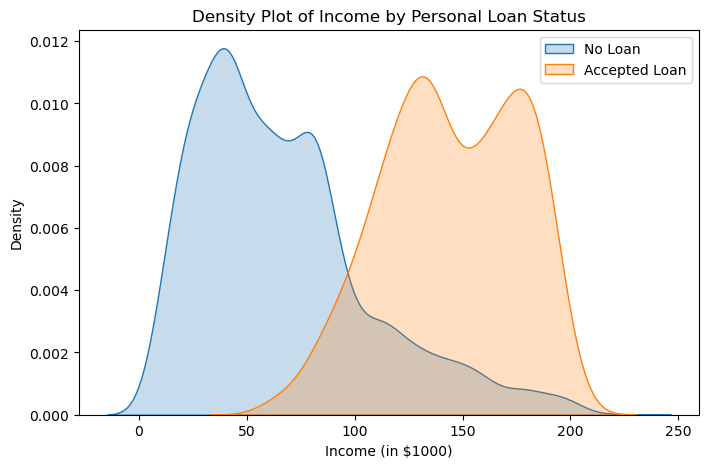

In [57]:
# personal loan vs. income
# group statistics: average income by personal loan status
group_stats = data_copy.groupby("Personal_Loan")["Income"].agg(["mean", "median", "count"])
print("Average Income by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# boxplot to compare income distribution for loan acceptance
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Personal_Loan", y = "Income")
plt.title("Boxplot of Income by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Income (in $1000)")
plt.show()

# density plot for income distribution by loan status
plt.figure(figsize = (8, 5))
sns.kdeplot(data = data_copy[data_copy["Personal_Loan"] == 0], x = "Income", label = "No Loan", fill = True)
sns.kdeplot(data = data_copy[data_copy["Personal_Loan"] == 1], x = "Income", label = "Accepted Loan", fill = True)
plt.title("Density Plot of Income by Personal Loan Status")
plt.xlabel("Income (in $1000)")
plt.legend()
plt.show()

According to the data, higher-income customers are significantly more likely to accept personal loans. This trend could be due to their higher financial capability or better eligibility for loan offers. This relationship indicates that income is a critical factor in predicting personal loan acceptance.

Average Family Size by Personal Loan Status: 
                   mean  median  count
Personal_Loan                         
0              2.373451     2.0   4520
1              2.612500     3.0    480
--------------------------------------------------


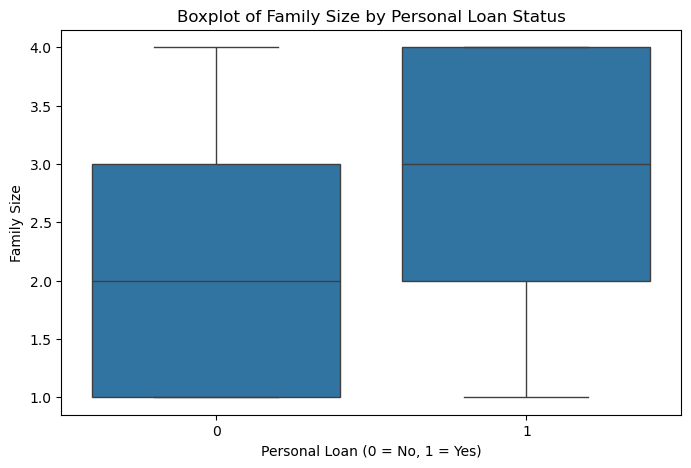

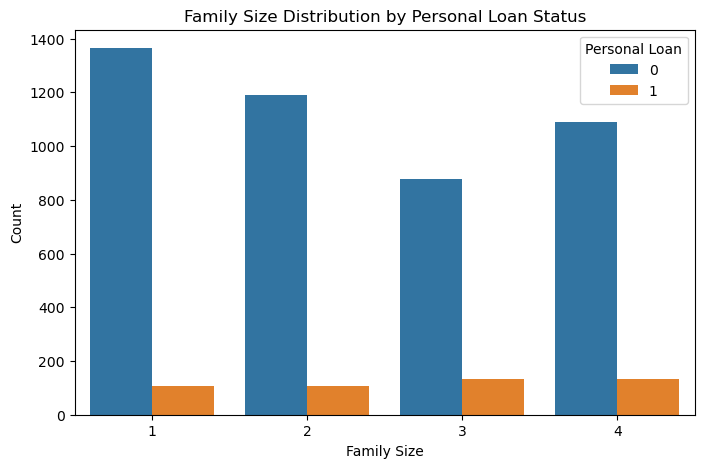

In [60]:
# personal loan vs. family
# group statistics: average family size by personal loan status
group_stats = data_copy.groupby("Personal_Loan")["Family"].agg(["mean", "median", "count"])
print("Average Family Size by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# boxplot to compare family size distribution for loan acceptance
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Personal_Loan", y = "Family")
plt.title("Boxplot of Family Size by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Family Size")
plt.show()

# bar plot to compare family size frequencies by loan status
plt.figure(figsize = (8, 5))
sns.countplot(data = data_copy, x = "Family", hue = "Personal_Loan")
plt.title("Family Size Distribution by Personal Loan Status")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.legend(title = "Personal Loan", loc = "upper right")
plt.show()

Larger family sizes might correlate with a greater likelihood of accepting a personal loan, potentially due to higher financial needs or expenses. Family size distribution for loan acceptance shows a slight skew toward larger families, but the overall trend indicates that most customers, regardless of family size, do not accept personal loans. 

Average CC Avg by Personal Loan Status: 
                   mean  median  count
Personal_Loan                         
0              1.729009     1.4   4520
1              3.905354     3.8    480
--------------------------------------------------


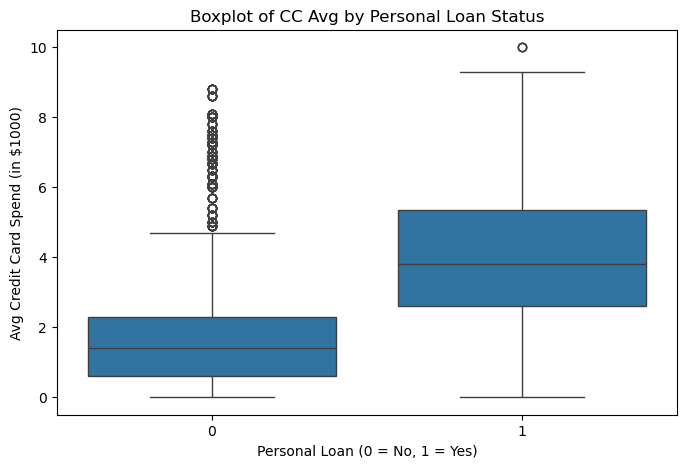

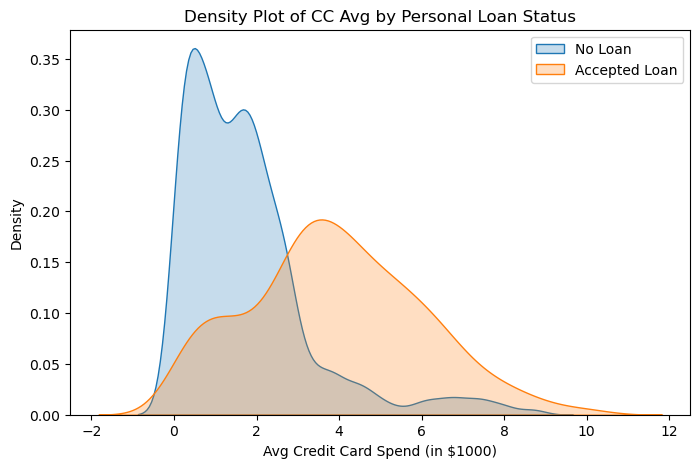

In [63]:
# personal loan vs. CC avg
# group statistics: average cc avg by personal loan status
group_stats = data_copy.groupby("Personal_Loan")["CCAvg"].agg(["mean", "median", "count"])
print("Average CC Avg by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# boxplot to compare cc avg distribution for loan acceptance
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Personal_Loan", y = "CCAvg")
plt.title("Boxplot of CC Avg by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Avg Credit Card Spend (in $1000)")
plt.show()

# density plot for cc avg distribution by loan status
plt.figure(figsize = (8, 5))
sns.kdeplot(data = data_copy[data_copy["Personal_Loan"] == 0], x = "CCAvg", label = "No Loan", fill = True)
sns.kdeplot(data = data_copy[data_copy["Personal_Loan"] == 1], x = "CCAvg", label = "Accepted Loan", fill = True)
plt.title("Density Plot of CC Avg by Personal Loan Status")
plt.xlabel("Avg Credit Card Spend (in $1000)")
plt.legend()
plt.show()

The boxplot shows a clear difference in the average credit card spending (CCAvg) between customers who accepted the personal loan (1) and those who did not (0). Customers who accepted the loan have a higher median credit card spend compared to those who did not accept the loan.
Customers with higher average credit card spending may have a greater need for liquidity or additional financial support, making them more likely to accept a personal loan. Banks could use CCAvg as a key indicator to target potential customers for personal loan campaigns.

Average Education Level by Personal Loan Status: 
                   mean  median  count
Personal_Loan                         
0              1.843584     2.0   4520
1              2.233333     2.0    480
--------------------------------------------------


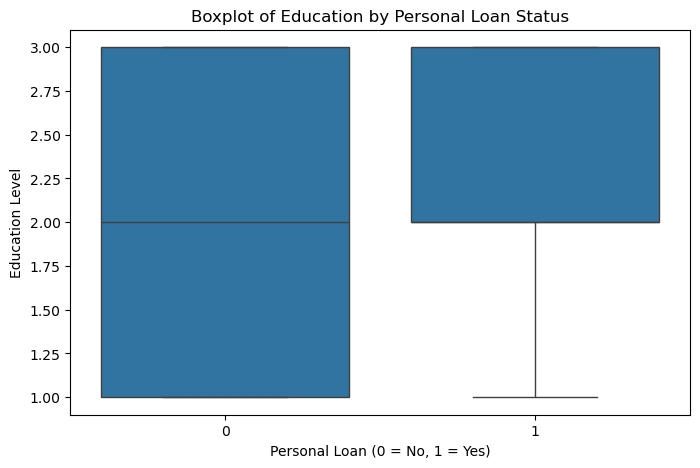

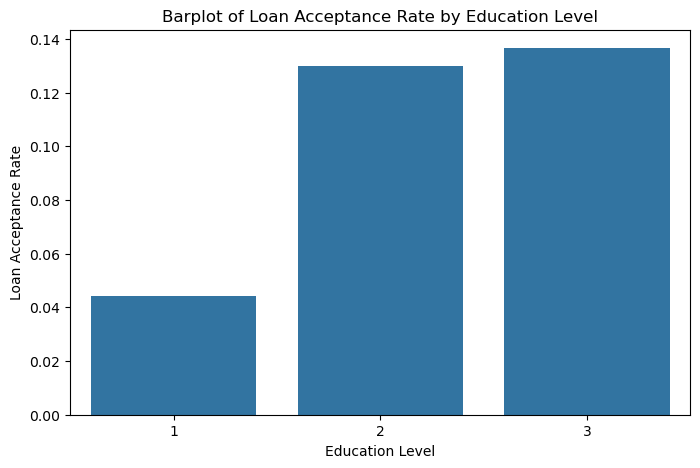

In [66]:
# personal loan vs. education
# group statistics: average education level by personal loan status
group_stats = data_copy.groupby("Personal_Loan")["Education"].agg(["mean", "median", "count"])
print("Average Education Level by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# boxplot to compare education distribution for loan acceptance
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Personal_Loan", y = "Education")
plt.title("Boxplot of Education by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Education Level")
plt.show()

# barplot for education level by loan status
plt.figure(figsize = (8, 5))
sns.barplot(
    data = data_copy,
    x = "Education",
    y = "Personal_Loan",
    ci = None,
)
plt.title("Barplot of Loan Acceptance Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Loan Acceptance Rate")
plt.show()

Customers who accepted the personal loan (1) predominantly have higher education levels (3 = Professional, 2 = Graduate). Customers who did not accept the personal loan (0) have a more diverse range of education levels, with many having lower levels (1 = Undergraduate). Higher education levels are often correlated with higher income and financial literacy, which may make individuals more likely to accept loan offers. They may see loans as an opportunity to leverage their financial situation or investment options.

Average Mortgage by Personal Loan Status: 
                     mean  median  count
Personal_Loan                           
0               51.789381     0.0   4520
1              100.845833     0.0    480
--------------------------------------------------


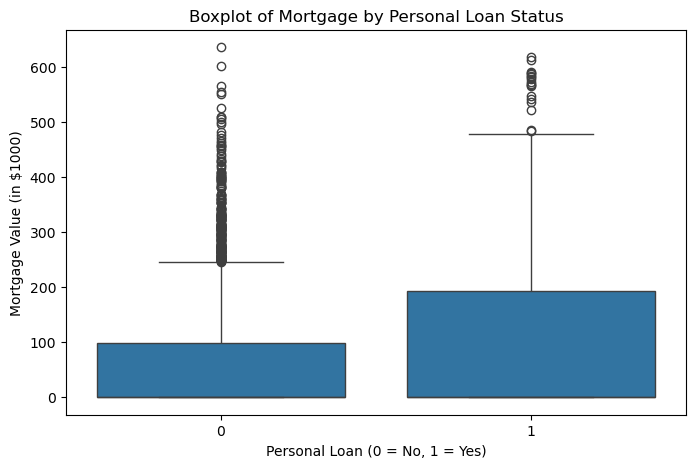

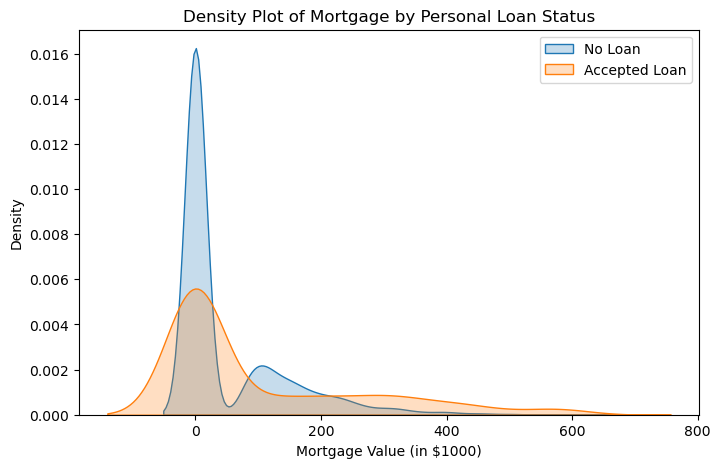

In [69]:
# personal loan vs. mortgage
# group statistics: average mortgage by personal loan status
group_stats = data_copy.groupby("Personal_Loan")["Mortgage"].agg(["mean", "median", "count"])
print("Average Mortgage by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# boxplot to compare mortgage distribution for loan acceptance
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Personal_Loan", y = "Mortgage")
plt.title("Boxplot of Mortgage by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Mortgage Value (in $1000)")
plt.show()

# density plot for mortgage distribution by loan status
plt.figure(figsize = (8, 5))
sns.kdeplot(data = data_copy[data_copy["Personal_Loan"] == 0], x = "Mortgage", label = "No Loan", fill = True)
sns.kdeplot(data = data_copy[data_copy["Personal_Loan"] == 1], x = "Mortgage", label = "Accepted Loan", fill = True)
plt.title("Density Plot of Mortgage by Personal Loan Status")
plt.xlabel("Mortgage Value (in $1000)")
plt.legend()
plt.show()

The analysis shows that individuals who accepted a personal loan generally have higher mortgage values than those who did not. The boxplot highlights a higher median mortgage value among loan acceptors, while the density plot reveals that non-acceptors are concentrated around zero, indicating little to no mortgage. Customers with higher mortgages may have greater financial obligations, making them more likely to accept personal loans for additional liquidity.

Securities Account Ownership by Personal Loan Status: 
                   mean  sum  count
Personal_Loan                      
0              0.102212  462   4520
1              0.125000   60    480
--------------------------------------------------


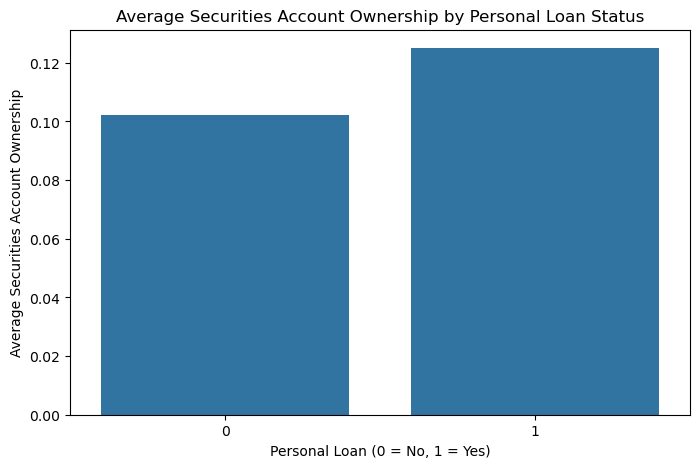

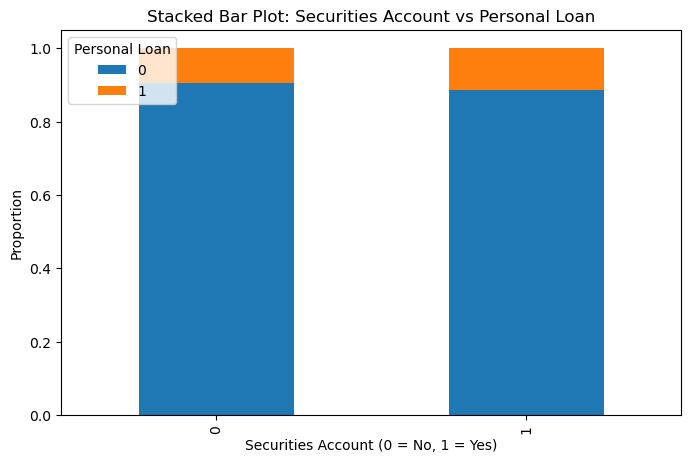

In [72]:
# personal loan vs. securities account
# group statistics: count of securities account ownership by personal loan status
group_stats = data_copy.groupby("Personal_Loan")["Securities_Account"].agg(["mean", "sum", "count"])
print("Securities Account Ownership by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# bar plot to compare securities account ownership by personal loan status
plt.figure(figsize = (8, 5))
sns.barplot(data = data_copy, x = "Personal_Loan", y = "Securities_Account", ci = None)
plt.title("Average Securities Account Ownership by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Average Securities Account Ownership")
plt.show()

# stacked bar plot for securities account vs personal loan
securities_loan_crosstab = pd.crosstab(data_copy["Securities_Account"], data_copy["Personal_Loan"], normalize = "index")
securities_loan_crosstab.plot(
    kind = "bar",
    stacked = True,
    figsize = (8, 5),
)
plt.title("Stacked Bar Plot: Securities Account vs Personal Loan")
plt.xlabel("Securities Account (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.legend(title = "Personal Loan", loc = "upper left")
plt.show()

The first bar plot shows that individuals who accepted a personal loan (1) have slightly higher average ownership of securities accounts compared to those who did not (0). However, the difference is relatively small. The stacked bar plot further emphasizes this trend, showing that within each securities account ownership group, a higher proportion of individuals without securities accounts declined the loan, while individuals with securities accounts were slightly more likely to accept the loan. This relationship may exist because individuals with securities accounts are likely to have better financial management habits or higher financial literacy, which could make them more inclined to accept a personal loan for investment or other purposes.

Average CD Account Ownership by Personal Loan Status: 
                   mean  median  count
Personal_Loan                         
0              0.035841     0.0   4520
1              0.291667     0.0    480
--------------------------------------------------


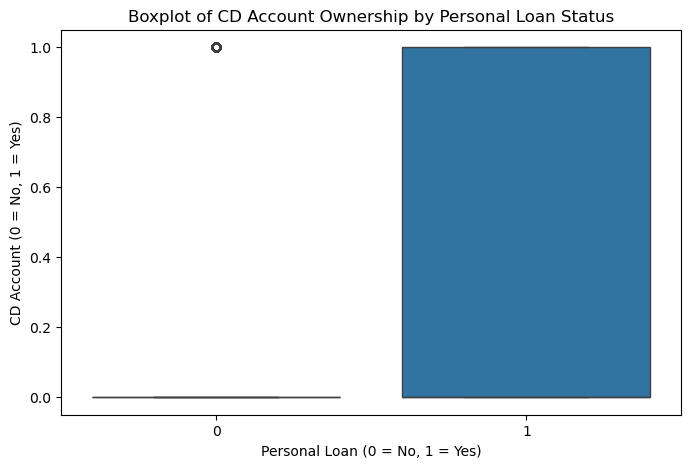

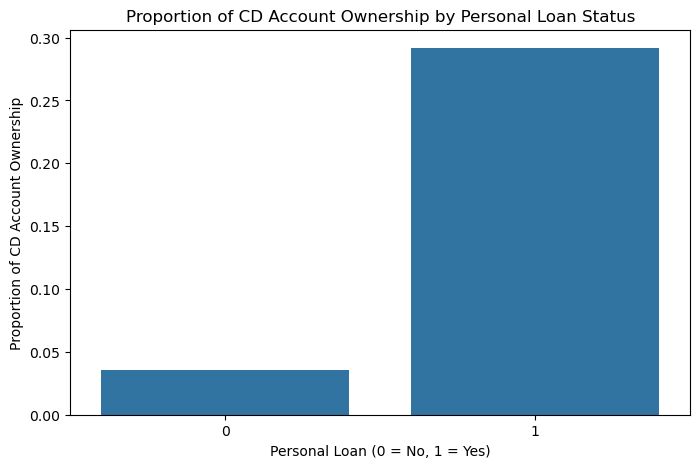

In [75]:
# personal loan vs. CD account
# group statistics: average cd account ownership by personal loan status
group_stats = data_copy.groupby("Personal_Loan")["CD_Account"].agg(["mean", "median", "count"])
print("Average CD Account Ownership by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# boxplot to compare cd account ownership for loan acceptance
plt.figure(figsize = (8, 5))
sns.boxplot(data = data_copy, x = "Personal_Loan", y = "CD_Account")
plt.title("Boxplot of CD Account Ownership by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("CD Account (0 = No, 1 = Yes)")
plt.show()

# barplot to compare cd account proportions for loan acceptance
plt.figure(figsize = (8, 5))
sns.barplot(data = data_copy, x = "Personal_Loan", y = "CD_Account", ci = None)
plt.title("Proportion of CD Account Ownership by Personal Loan Status")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Proportion of CD Account Ownership")
plt.show()

The boxplot and bar plot indicate a significant relationship between having a Certificate of Deposit (CD) account and accepting a personal loan. Customers who accepted the personal loan are far more likely to own a CD account, as shown by the higher proportions in the bar plot and the distinct separation in the boxplot. Customers with a CD account may have higher financial literacy, savings, or trust in the bank, making them more likely to take advantage of a loan offer. Banks might target CD account holders more aggressively for loan offers due to their established financial relationship.

Online Usage by Personal Loan Status: 
                   mean   sum  count
Personal_Loan                       
0              0.595796  2693   4520
1              0.606250   291    480
--------------------------------------------------


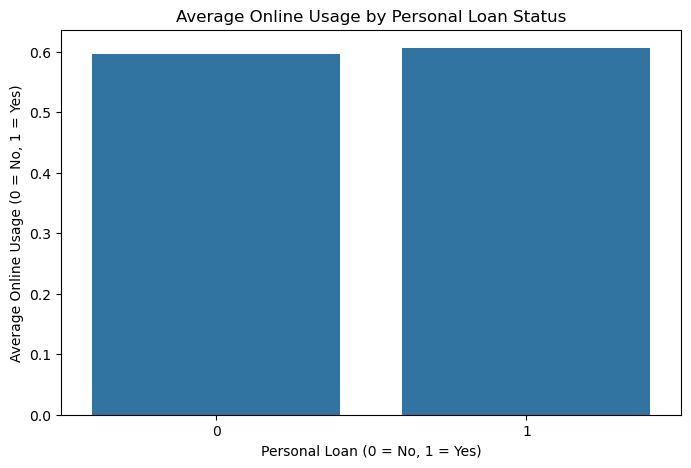

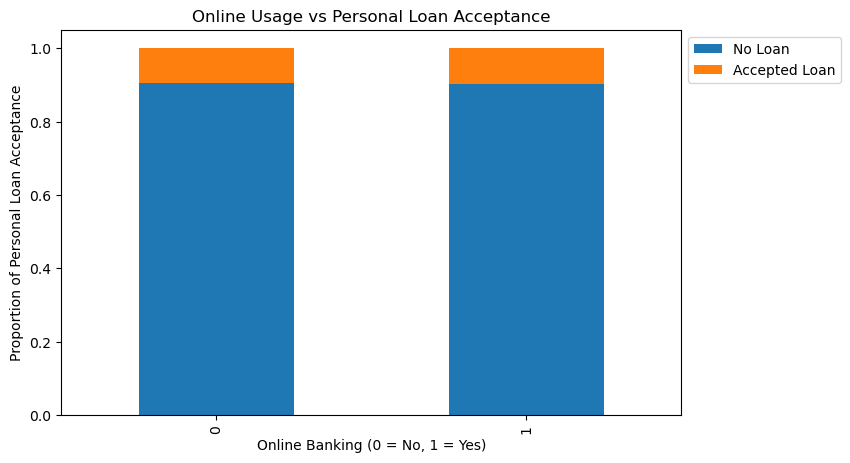

In [78]:
# personal loan vs. online
# group statistics: average online usage by personal loan status
group_stats = data_copy.groupby("Personal_Loan")["Online"].agg(["mean", "sum", "count"])
print("Online Usage by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# bar plot to compare online usage for loan acceptance
plt.figure(figsize = (8, 5))  # set figure size
sns.barplot(data = data_copy, x = "Personal_Loan", y = "Online", ci = None)
plt.title("Average Online Usage by Personal Loan Status")  # set title
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")  # set x-axis label
plt.ylabel("Average Online Usage (0 = No, 1 = Yes)")  # set y-axis label
plt.show()  # show plot

# stacked barplot for online usage by loan status
online_tab = pd.crosstab(data_copy["Online"], data_copy["Personal_Loan"], normalize = "index")
online_tab.plot(kind = "bar", stacked = True, figsize = (8, 5))
plt.title("Online Usage vs Personal Loan Acceptance")  # set title
plt.xlabel("Online Banking (0 = No, 1 = Yes)")  # set x-axis label
plt.ylabel("Proportion of Personal Loan Acceptance")  # set y-axis label
plt.legend(["No Loan", "Accepted Loan"], bbox_to_anchor = (1, 1))  # set legend
plt.show()  # show plot

The first bar chart shows that the average usage of online banking is almost identical between customers who accepted a personal loan and those who did not. The second stacked bar chart further confirms this pattern. It illustrates that within both online banking usage categories (users and non-users), the proportion of customers accepting a personal loan is relatively low compared to those who did not accept. This suggests that online banking usage is not a strong differentiator for personal loan acceptance in this dataset.

Credit Card Usage by Personal Loan Status: 
                   mean  median  count
Personal_Loan                         
0              0.293584     0.0   4520
1              0.297917     0.0    480
--------------------------------------------------


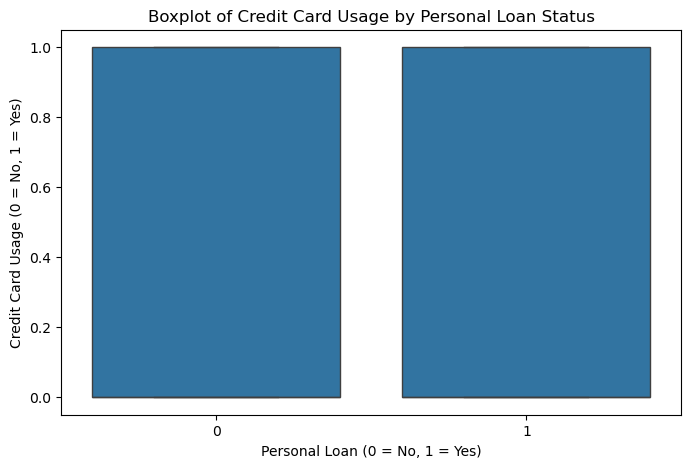

<Figure size 800x500 with 0 Axes>

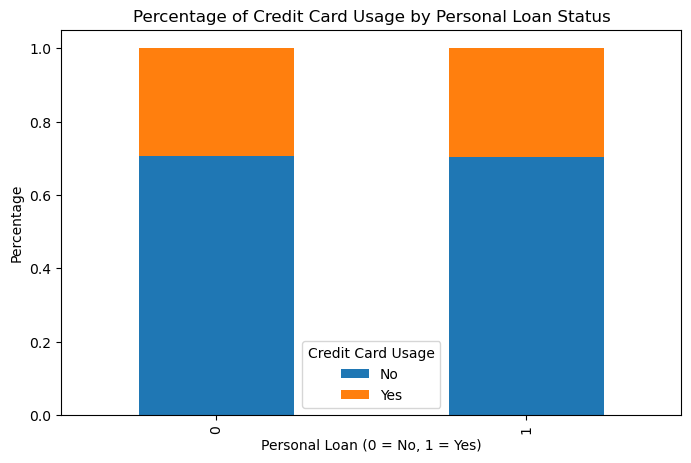

In [81]:
# personal loan vs. credit card
# calculate group statistics for personal loan and credit card
group_stats = data_copy.groupby("Personal_Loan")["CreditCard"].agg(["mean", "median", "count"])
print("Credit Card Usage by Personal Loan Status: ")
print(group_stats)
print("-" * 50)

# boxplot to compare credit card usage for loan acceptance
plt.figure(figsize = (8, 5))  # set figure size
sns.boxplot(data = data_copy, x = "Personal_Loan", y = "CreditCard")  # create boxplot
plt.title("Boxplot of Credit Card Usage by Personal Loan Status")  # add plot title
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")  # label x-axis
plt.ylabel("Credit Card Usage (0 = No, 1 = Yes)")  # label y-axis
plt.show()  # show plot

# barplot to show percentages of credit card usage by loan status
plt.figure(figsize = (8, 5))  # set figure size
loan_credit_crosstab = pd.crosstab(data_copy["Personal_Loan"], data_copy["CreditCard"], normalize = "index")  # create crosstab
loan_credit_crosstab.plot(kind = "bar", stacked = True, figsize = (8, 5))  # create stacked barplot
plt.title("Percentage of Credit Card Usage by Personal Loan Status")  # add plot title
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")  # label x-axis
plt.ylabel("Percentage")  # label y-axis
plt.legend(title = "Credit Card Usage", labels = ["No", "Yes"])  # add legend
plt.show()  # show plot

The analysis of Personal_Loan and CreditCard shows that credit card usage is relatively consistent across customers regardless of whether they accepted a personal loan or not. The boxplot suggests there is little to no variability in credit card usage within each group, as both categories exhibit nearly identical distributions. This suggests that credit card usage might not be a strong predictor for personal loan acceptance. One possible reasoning is that customers' credit card ownership may reflect general financial behavior but does not directly correlate with their likelihood to accept a personal loan.

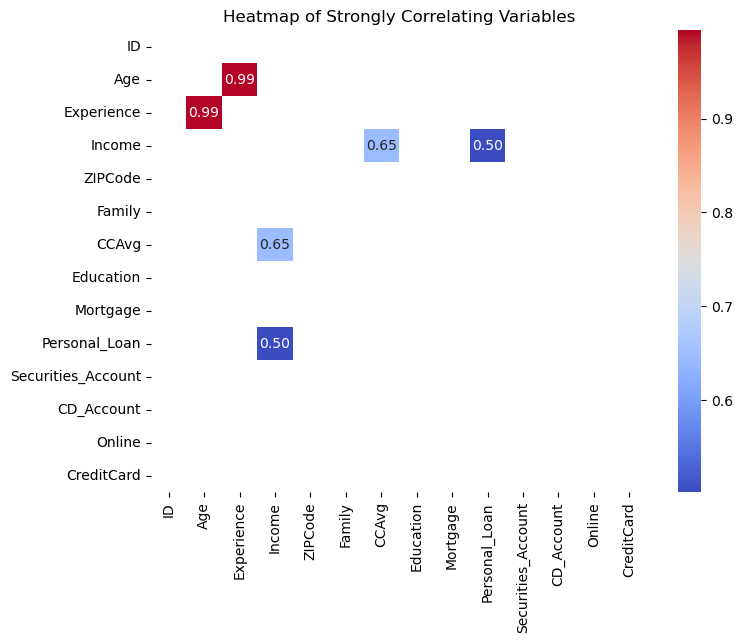

In [84]:
# all variables
# calculate correlation matrix for all numeric variables
correlation_matrix = data_copy.corr()

# find most correlating variables (absolute correlation > 0.5, excluding self-correlation)
strong_correlations = correlation_matrix[
    (correlation_matrix.abs() > 0.5) & (correlation_matrix != 1)
]

# create a heatmap for strong correlations
plt.figure(figsize = (8, 6))  # set figure size
sns.heatmap(strong_correlations, annot = True, cmap = "coolwarm", fmt = ".2f", cbar = True)  # create heatmap
plt.title("Heatmap of Strongly Correlating Variables")  # add plot title
plt.show()  # display heatmap

From this data, we can see that variables like Age and Experience should be reviewed for redundancy; one can likely be dropped. Correlations involving Income highlight its importance as a potential predictor for Personal_Loan. Similarly, CCAvg and Family may indirectly influence loan acceptance due to their association with income. While correlations above 0.5 provide insights, they don't indicate causation. Additional analyses like feature importance or regression modeling are necessary to confirm these relationships.

After completing both univariate analysis and bivariate analysis on this data set, we are able to answer some questions:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
    
The distribution of the Mortgage attribute is highly skewed to the right, with most values concentrated around 0. A large number of customers do not have a mortgage. There are noticeable outliers in the dataset, as shown by the boxplot. These outliers represent customers with mortgages over $300,000, but they are relatively few compared to the majority.


2. How many customers have credit cards?
   
From the univariate analysis of CreditCard, approximately 1,500 customers use credit cards (value 1), while around 3,500 do not (value 0). 

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
    
Income has a moderate positive correlation (0.50) with Personal_Loan, indicating that higher income increases the likelihood of accepting a loan. CCAvg (average monthly credit card spending) has a notable correlation with Personal_Loan, as it is closely tied to financial behavior.

4. How does a customer's interest in purchasing a loan vary with their age?
    
The bivariate analysis shows that Age does not have a strong direct impact on personal loan acceptance. Both younger and older customers have similar proportions of loan acceptance. This suggests that other financial factors, such as income or spending behavior, may play a larger role than age.

5. How does a customer's interest in purchasing a loan vary with their education?
    
Customers with higher education levels (graduate or professional degrees) show a greater likelihood of accepting a personal loan. This may reflect that individuals with advanced education tend to have higher incomes, making them more eligible or inclined to take loans.

## Data Preprocessing

* Missing value treatment
* Feature engineering
* Outlier detection and treatment
* Preparing data for modeling

In [90]:
# missing/incorrect value treatment
# find unique values in experience column
unique_experience = data_copy["Experience"].unique()  # find all unique experience values
print("Unique values in Experience column:", unique_experience)

# check for negative experience values
negative_experience = data_copy[data_copy["Experience"] < 0]["Experience"].unique()  # find unique negative experience values
print("Negative values in Experience column:", negative_experience)

# correct negative experience values
data_copy["Experience"].replace(-1, 1, inplace = True)  # replace -1 with 1
data_copy["Experience"].replace(-2, 2, inplace = True)  # replace -2 with 2
data_copy["Experience"].replace(-3, 3, inplace = True)  # replace -3 with 3
print("Corrected Experience column values:", data_copy["Experience"].unique())  # check corrected unique values

Unique values in Experience column: [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Negative values in Experience column: [-1 -2 -3]
Corrected Experience column values: [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 34  0 38 40 33  4 42 43]


Negative values in the Experience column are unrealistic because professional experience cannot logically be negative. These could be due to errors during data collection, entry, or processing. Correcting such values ensures data accuracy and reliability, which is critical for proper analysis and model building. Uncorrected errors might skew results and negatively affect model performance. Replacing negative values with positive equivalents (e.g., -1 replaced with 1) assumes the negatives are likely data entry errors that intended to represent valid experience values.

In [93]:
# feature engineering
# count unique zip codes
unique_zip = data_copy["ZIPCode"].nunique()  # count unique zip codes
print("Number of unique ZIP codes:", unique_zip)

# convert zip codes to string
data_copy["ZIPCode"] = data_copy["ZIPCode"].astype(str)  # convert zip code column to string

# count unique first two digits of zip codes
unique_zip_prefix = data_copy["ZIPCode"].str[0:2].nunique()  # count unique two-digit prefixes
print("Number of unique values if we take first two digits of ZIPCode:", unique_zip_prefix)

# replace zip codes with first two digits
data_copy["ZIPCode"] = data_copy["ZIPCode"].str[0:2]  # extract and assign first two digits

# convert zip codes to categorical data type
data_copy["ZIPCode"] = data_copy["ZIPCode"].astype("category")  # convert to category

# define categorical columns
cat_cols = [
    "Education",  # education level
    "Personal_Loan",  # personal loan acceptance
    "Securities_Account",  # securities account ownership
    "CD_Account",  # cd account ownership
    "Online",  # online banking usage
    "CreditCard",  # credit card usage
    "ZIPCode",  # zip code (first two digits)
]

# convert categorical columns to category type
data_copy[cat_cols] = data_copy[cat_cols].astype("category")  # convert to category type

# verify changes
print("Categorical columns converted successfully:")
print(data_copy[cat_cols].dtypes)

Number of unique ZIP codes: 467
Number of unique values if we take first two digits of ZIPCode: 7
Categorical columns converted successfully:
Education             category
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
ZIPCode               category
dtype: object


The ZIPCode column has 7 unique values, even when only considering the first two digits. This implies that the ZIP codes in the dataset already represent broader geographic groupings, and slicing them to two digits does not change their grouping. Converting all relevant columns to categorical type prepares the dataset for analysis and modeling, reducing memory usage and ensuring compatibility with encoding techniques. The output confirms that the transformation and preparation steps were successful. The dataset is now optimized and ready for further preprocessing.

In [96]:
# outlier detection and treatment
# find 25th and 75th percentiles for numeric columns
q1 = data_copy.select_dtypes(include = ["float64", "int64"]).quantile(0.25)  # 25th percentile
q3 = data_copy.select_dtypes(include = ["float64", "int64"]).quantile(0.75)  # 75th percentile

# calculate interquartile range
iqr = q3 - q1  # calculate iqr as difference between q3 and q1

# calculate lower and upper bounds for outliers
lower = q1 - 1.5 * iqr  # lower bound for outliers
upper = q3 + 1.5 * iqr  # upper bound for outliers

# calculate percentage of outliers in each column
outlier_percentage = (
    (data_copy.select_dtypes(include = ["float64", "int64"]) < lower)
    | (data_copy.select_dtypes(include = ["float64", "int64"]) > upper)
).sum() / len(data_copy) * 100  # count outliers and convert to percentage

# print outlier percentages
print("Percentage of outliers in each numeric column: ")
print(outlier_percentage)

Percentage of outliers in each numeric column: 
ID            0.00
Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64


Treating these outliers ensures the model is not disproportionately influenced by extreme values. The columns ID, Age, Experience, and Family have 0% outliers. This suggests these columns have no extreme values outside the calculated bounds. While the outlier percentages are relatively low, they may still impact models that are sensitive to extreme values. 

In [99]:
# preparing data for modeling
# dropping experience and target variable
X = data_copy.drop(["Personal_Loan", "Experience"], axis = 1)  # drop target and redundant feature
Y = data_copy["Personal_Loan"]  # set target variable

# one-hot encode categorical features
X = pd.get_dummies(X, columns = ["ZIPCode", "Education"], drop_first = True)  # encode categorical features

# convert all columns to float type
X = X.astype(float)  # convert data to float for consistency

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size = 0.30, random_state = 1  # split data with 70% train and 30% test
)

# print shapes of train and test sets
print("Shape of training set: ", X_train.shape)  # print shape of training set
print("Shape of test set: ", X_test.shape)  # print shape of test set

# print class distribution in training set
print("Percentage of classes in training set:")  
print(y_train.value_counts(normalize = True))  # print percentage of classes in training set

# print class distribution in test set
print("Percentage of classes in test set:")  
print(y_test.value_counts(normalize = True))  # print percentage of classes in test set

Shape of training set:  (3500, 18)
Shape of test set:  (1500, 18)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


The preprocessing steps in this code prepare the dataset for modeling by ensuring it is structured and formatted correctly for machine learning algorithms. The Experience column is dropped because it is perfectly correlated with Age, which prevents multicollinearity issues that could negatively affect model performance. The target variable, Personal_Loan, is separated into a standalone variable (Y) for supervised learning, while the features (X) are further processed. Categorical variables, such as ZIPCode and Education, are encoded using one-hot encoding to transform them into numerical format required for most machine learning models. The dataset is then split into training (70%) and test (30%) sets, using a fixed random state to ensure reproducibility.

## Model Building

### Model Evaluation Criterion

The target variable ('Personal_Loan') is binary with a class imbalance (90% '0', 10% '1'). The primary evaluation metric should be the F1-score, as it balances precision (accuracy of positive predictions) and recall (correct identification of positives), ensuring the model performs well on both classes. Secondary metrics like precision, recall, and the ROC-AUC score provide additional insights into class balance and overall discriminatory power. Accuracy alone is insufficient due to the imbalance, as it might favor the majority class. These metrics ensure fair and effective model evaluation.

### Model Building

In [106]:
# create functions to check performance of model
# function to compute evaluation metrics for classification models using sklearn
def model_performance_classification_sklearn(model, features, actual):

    # predict target values
    predictions = model.predict(features)

    # calculate metrics
    accuracy = accuracy_score(actual, predictions)  # overall correctness of predictions
    recall = recall_score(actual, predictions)  # true positives identified
    precision = precision_score(actual, predictions)  # accuracy of positive predictions
    f1 = f1_score(actual, predictions)  # balance of precision and recall

    # store metrics in a dataframe
    performance_metrics = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index = [0],
    )

    return performance_metrics

# function to create a confusion matrix with percentages
def confusion_matrix_sklearn(model, features, actual):

    # predict target values
    predictions = model.predict(features)

    # create confusion matrix
    matrix = confusion_matrix(actual, predictions)

    # annotate confusion matrix with absolute values and percentages
    labels = np.asarray(
        [
            f"{value:0.0f}\n{value / matrix.sum():.2%}" 
            for value in matrix.flatten()
        ]
    ).reshape(2, 2)

    # plot heatmap
    plt.figure(figsize = (6, 4))
    sns.heatmap(matrix, annot = labels, fmt = "")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix")
    plt.show()

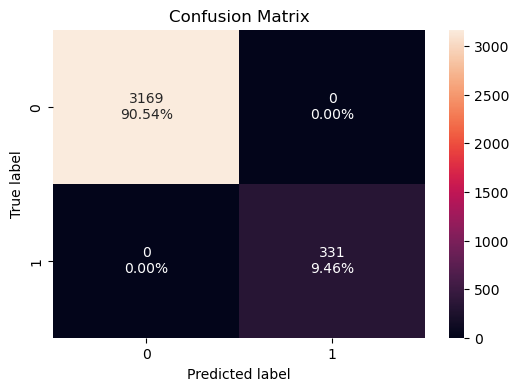

   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [108]:
# create decision tree
# import required library
from sklearn.tree import DecisionTreeClassifier

# initialize the decision tree classifier with gini criterion
decision_tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 1)

# train the model on the training dataset
decision_tree_model.fit(X_train, y_train)

# visualize confusion matrix for the training dataset
confusion_matrix_sklearn(
    model = decision_tree_model, 
    features = X_train, 
    actual = y_train
)

# calculate classification metrics for the training dataset
decision_tree_metrics_train = model_performance_classification_sklearn(
    model = decision_tree_model, 
    features = X_train, 
    actual = y_train
)

# display the classification metrics
print(decision_tree_metrics_train)

The confusion matrix and accompanying metrics indicate that the model performed perfectly on the test data. It correctly classified all 3169 customers who did not take a personal loan (true negatives) and all 331 customers who did take a personal loan (true positives). The confusion matrix shows no false positives or false negatives, which aligns with the calculated metrics: Accuracy, Recall, Precision, and F1-Score are all 1.0 (100%). This level of performance could either indicate a highly effective model or potential overfitting if the test data shares characteristics with the training data or lacks sufficient complexity. Further validation with a more diverse dataset might be necessary to confirm the robustness of the model.

Feature Names:  ['ID', 'Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


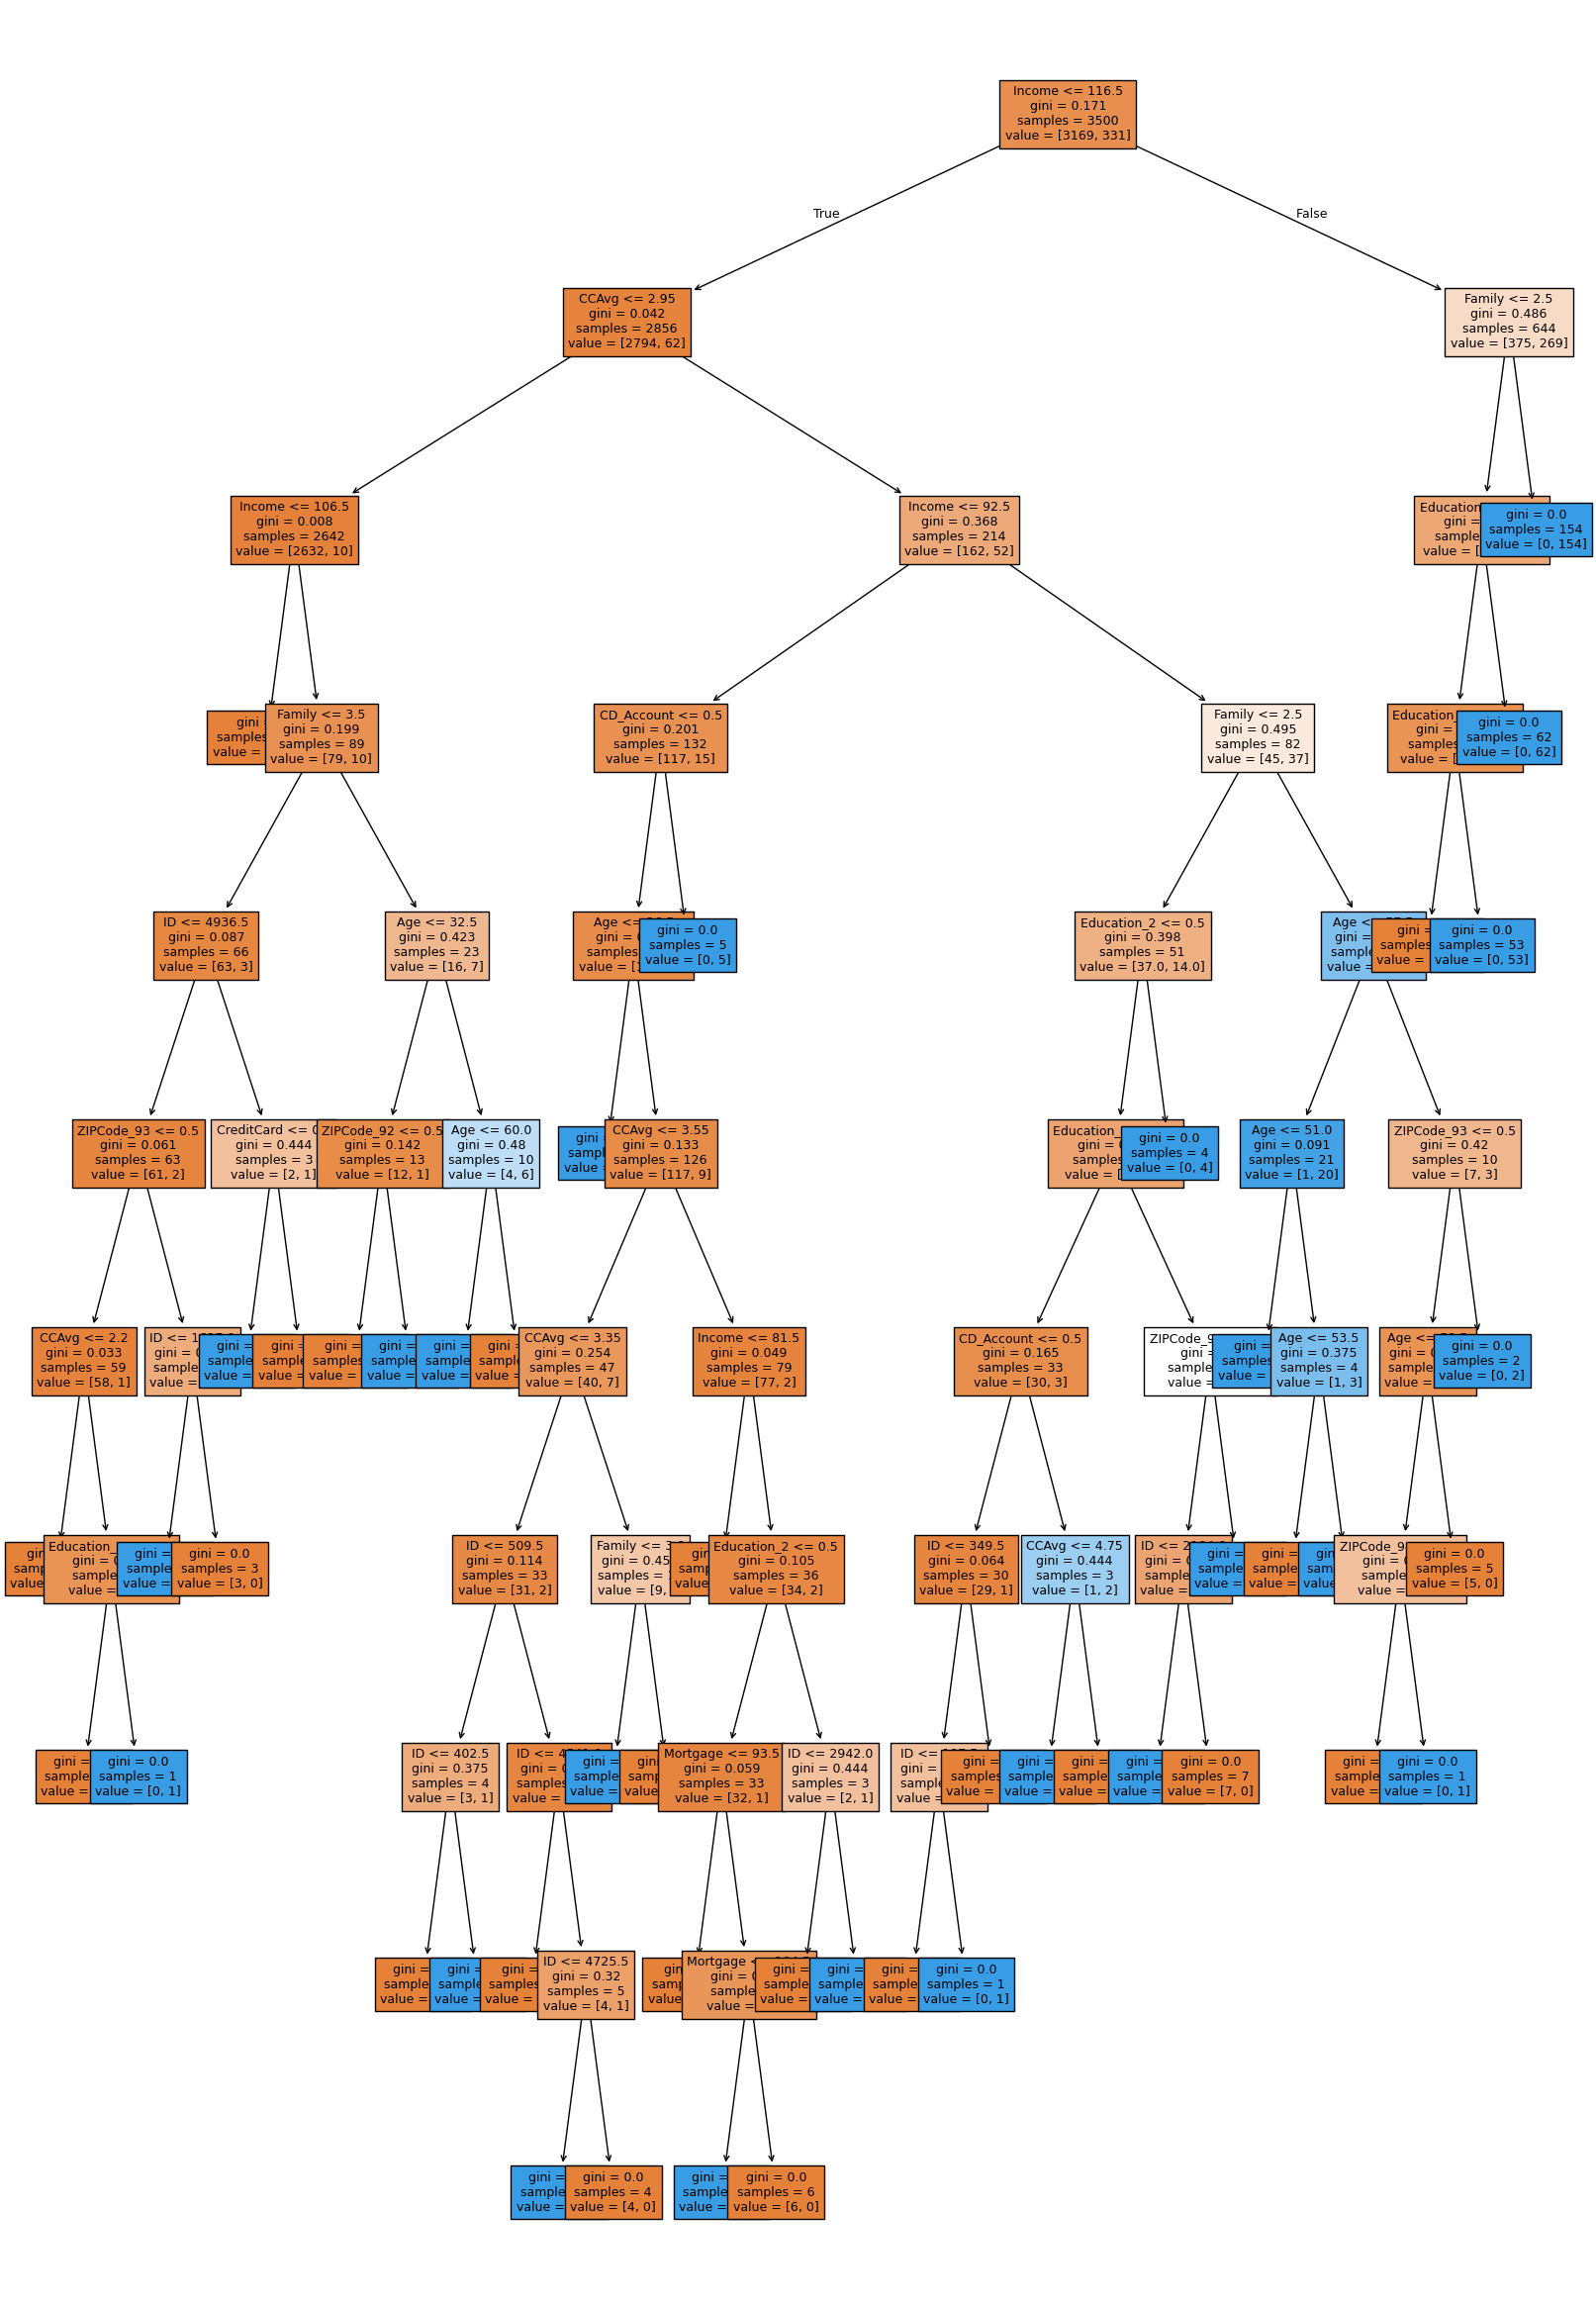

Decision Tree Rules: 
 |--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [51.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |   |--- ID <= 1627.00
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- ID >  1627.00
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |--- ID >  4936.50
|   |   |   |   |   |---

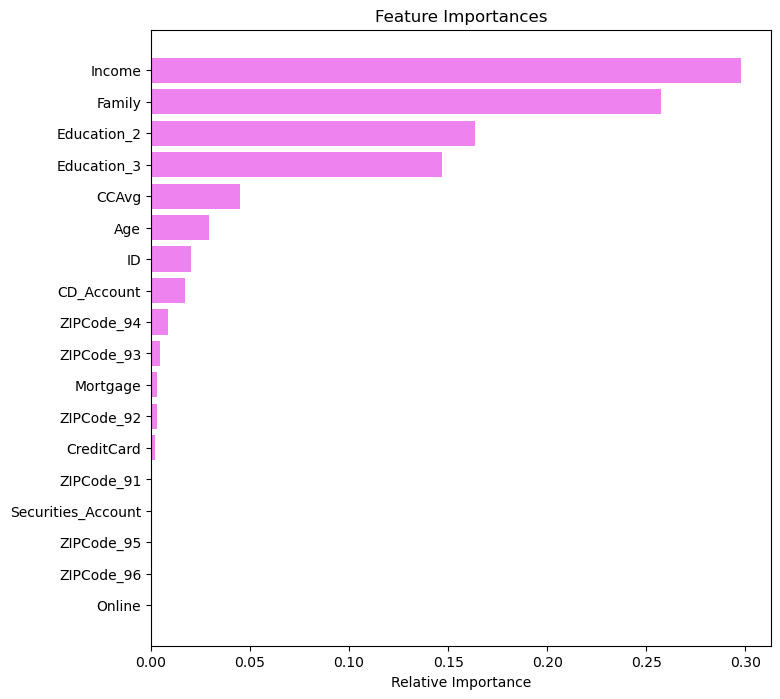

In [111]:
# visualizing tree
# import required modules
from sklearn.tree import export_text, plot_tree

# get feature names from training data
feature_names = list(X_train.columns)
print("Feature Names: ", feature_names)

# visualize the decision tree
plt.figure(figsize = (20, 30))
tree_visualization = plot_tree(
    decision_tree = decision_tree_model,
    feature_names = feature_names,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)

# ensure arrows in the decision tree are properly displayed
for node in tree_visualization:
    arrow = node.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

# display the decision tree
plt.show()

# export the rules of the decision tree as text
tree_rules = export_text(decision_tree = decision_tree_model, feature_names = feature_names, show_weights = True)
print("Decision Tree Rules: \n", tree_rules)

# calculate feature importance
feature_importances = pd.DataFrame(
    data = decision_tree_model.feature_importances_,
    columns = ["Importance"],
    index = X_train.columns
).sort_values(by = "Importance", ascending = False)

print("Feature Importances: \n", feature_importances)

# plot feature importances
importances = decision_tree_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (8, 8))
plt.title("Feature Importances")
plt.barh(
    range(len(indices)),
    importances[indices],
    color = "violet",
    align = "center"
)
plt.yticks(
    range(len(indices)),
    [feature_names[i] for i in indices]
)
plt.xlabel("Relative Importance")
plt.show()

The decision tree visualizations, feature importance graph, and outputs provide a detailed understanding of the model's structure and behavior. The decision tree structure illustrates how splits are made based on features like "Income," "Family," and "Education," using Gini impurity to select the most informative features at each step. Nodes with "gini=0.0" represent pure classifications where all samples belong to one class. From the feature importance chart, "Income" and "Family" are the most significant predictors for determining personal loan acceptance, followed by "Education" and "CCAvg." Features like ZIP code and "CreditCard" contribute very little to the decision-making process. This analysis indicates that high income and larger family sizes strongly correlate with personal loan acceptance, while ZIP code and credit card ownership have minimal influence. This suggests that socioeconomic factors and spending behavior dominate decision-making for loan approvals in this dataset. The decision tree model's splits reflect these findings effectively.

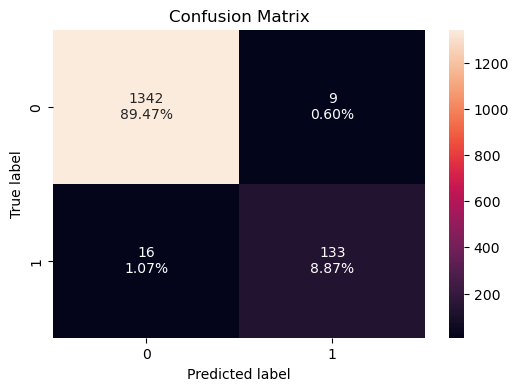

Performance Metrics for Decision Tree on Test Data: 
   Accuracy    Recall  Precision        F1
0  0.983333  0.892617    0.93662  0.914089


In [114]:
# checking model performance
# create confusion matrix for test data
confusion_matrix_sklearn(
    model = decision_tree_model,
    features = X_test,
    actual = y_test
)

# evaluate model performance on test data
decision_tree_perf_test = model_performance_classification_sklearn(
    model = decision_tree_model,
    features = X_test,
    actual = y_test
)

# display performance metrics for the test data
print("Performance Metrics for Decision Tree on Test Data: ")
print(decision_tree_perf_test)

The confusion matrix and performance metrics for the decision tree model on the test data indicate strong performance with an accuracy of 98.33%. Among the true negatives (class 0), 1,342 out of 1,358 instances were correctly classified, while only 9 false positives were observed. Similarly, for the true positives (class 1), 133 out of 149 instances were correctly classified, resulting in a recall of 89.26%. The model achieves a high precision of 93.66%, indicating that most predicted positives are actual positives, and an F1-score of 91.41% reflects a balanced trade-off between precision and recall. This demonstrates that the decision tree is effective at identifying both customers who are likely to accept a loan and those who are not, with a slight tendency to misclassify some customers as negatives when they are positives. The overall metrics suggest the model is well-suited for this classification task, but further tuning could reduce false negatives for better recall.

## Model Performance Improvement

**Pre-Pruning**

In [119]:
# define parameters to iterate over
max_depth_values = np.arange(2, 7, 2)  # depths to explore
max_leaf_nodes_values = [50, 75, 150, 250]  # leaf nodes to explore
min_samples_split_values = [10, 30, 50, 70]  # min samples to split

# initialize variables to store best model and performance
best_estimator = None  # best performing decision tree
best_score_diff = float("inf")  # smallest recall score difference
best_test_score = 0.0  # highest test recall score

# iterate over combinations of parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:
            # initialize tree with current parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight="balanced",  # balance classes
                random_state=42,  # ensure reproducibility
            )
            
            # train the model on training data
            estimator.fit(X_train, y_train)

            # predict on train and test sets
            y_train_pred = estimator.predict(X_train)  # train predictions
            y_test_pred = estimator.predict(X_test)  # test predictions

            # calculate recall scores for train and test
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # calculate recall score difference
            score_diff = abs(train_recall_score - test_recall_score)

            # update best model if criteria are met
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff  # update smallest difference
                best_test_score = test_recall_score  # update best test recall
                best_estimator = estimator  # update best model

# display best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")  # best depth
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")  # best leaf nodes
print(f"Min samples split: {best_estimator.min_samples_split}")  # best min split
print(f"Best test recall score: {best_test_score}")  # best test recall

# fit the best algorithm to the training data
best_model = best_estimator  # assign the best model to a variable
best_model.fit(X_train, y_train)  # train the best model on the training data

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

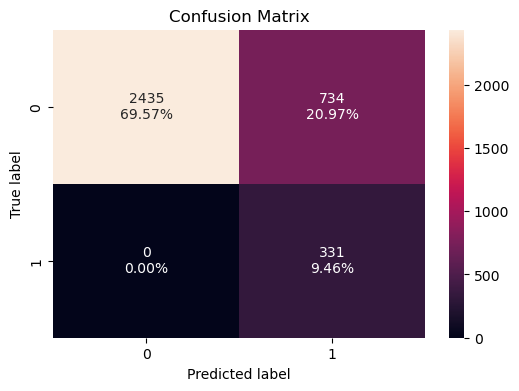

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


In [121]:
# create confusion matrix for training data
confusion_matrix_sklearn(best_model, X_train, y_train)

# check performance on training data
tuned_decision_tree_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)

# display performance metrics for the training data
tuned_decision_tree_perf_train

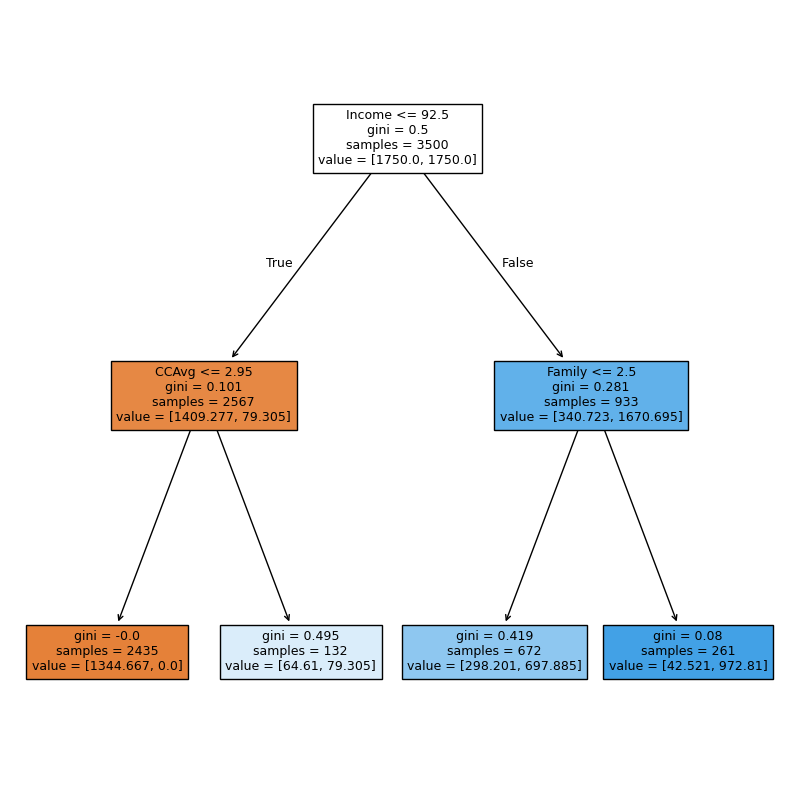

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1

                    Importance
Income                0.876529
CCAvg                 0.066940
Family                0.056531
ID                    0.000000
ZIPCode_92            0.000000
Education_2           0.000000
ZIPCode_96            0.000000
ZIPCode_95            0.000000
ZIPCode_94            0.000000
ZIPCode_93            0.000000
CreditCard            0.000000
ZIPCode_91            0.000000
Age                   0.000000
Online                0.000000
CD_Account            0.000000
Securities_Account    0.000000
Mortgage              0.000000
Education_3           0.000000


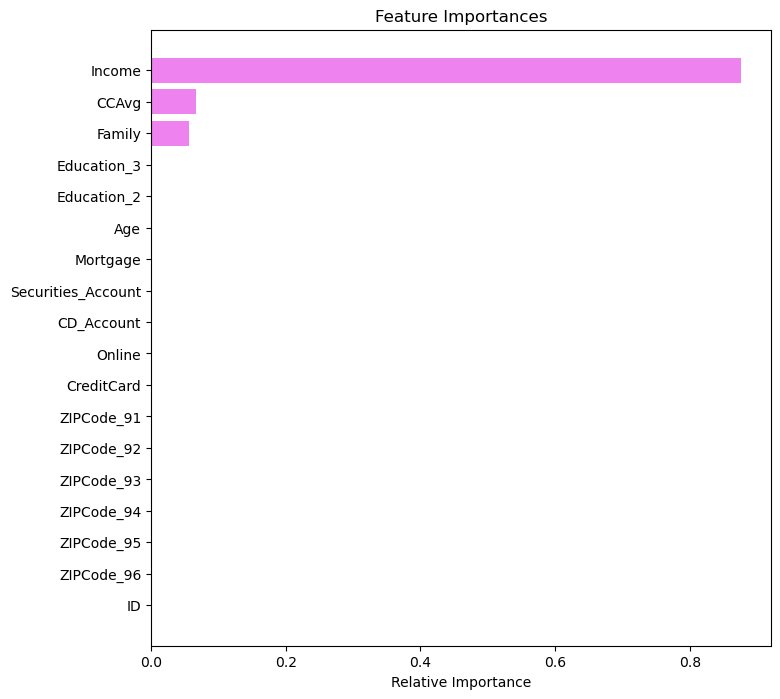

In [123]:
# visualize the decision tree
plt.figure(figsize = (10, 10))
tree_visual = tree.plot_tree(
    best_model,
    feature_names = feature_names,
    filled = True,
    fontsize = 9,
    node_ids = False,
    class_names = None,
)

# add arrows to the decision tree splits if missing
for node in tree_visual:
    arrow = node.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

# display the decision tree plot
plt.show()

# display text report showing the rules of the decision tree
print(tree.export_text(best_model, feature_names = feature_names, show_weights = True))

# calculate and display feature importances in the decision tree
feature_importances = pd.DataFrame(
    best_model.feature_importances_, columns = ["Importance"], index = X_train.columns
).sort_values(by = "Importance", ascending = False)
print(feature_importances)

# plot feature importances
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "violet", align = "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


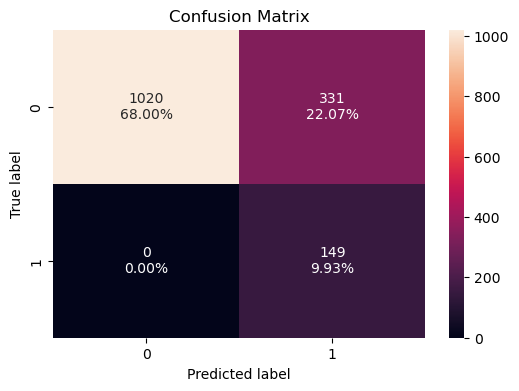

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


In [125]:
# create and display confusion matrix for test data
confusion_matrix_sklearn(best_model, X_test, y_test)

# evaluate the performance of the tuned decision tree model on test data
decision_tree_tuned_performance_test = model_performance_classification_sklearn(
    model = best_model, features = X_test, actual = y_test
)

# display the performance metrics for the test data
decision_tree_tuned_performance_test

**Post-Pruning**

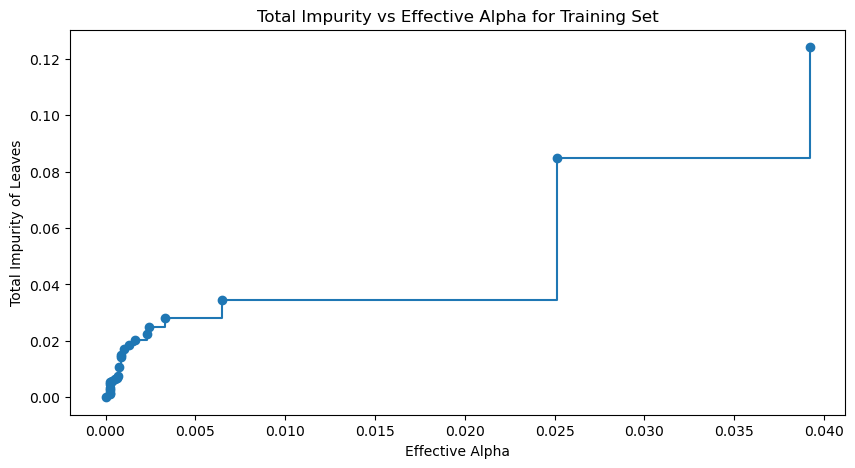

In [128]:
# initialize decision tree classifier
decision_tree_model = DecisionTreeClassifier(random_state = 1)

# calculate cost complexity pruning path for training data
pruning_path = decision_tree_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = pruning_path.ccp_alphas  # extract alpha values
impurities = pruning_path.impurities  # extract impurities
pruning_path_df = pd.DataFrame(pruning_path)  # create dataframe of pruning path

# plot total impurity vs effective alpha
plt.figure(figsize = (10, 5))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker = "o", drawstyle = "steps-post")
plt.xlabel("Effective Alpha")
plt.ylabel("Total Impurity of Leaves")
plt.title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


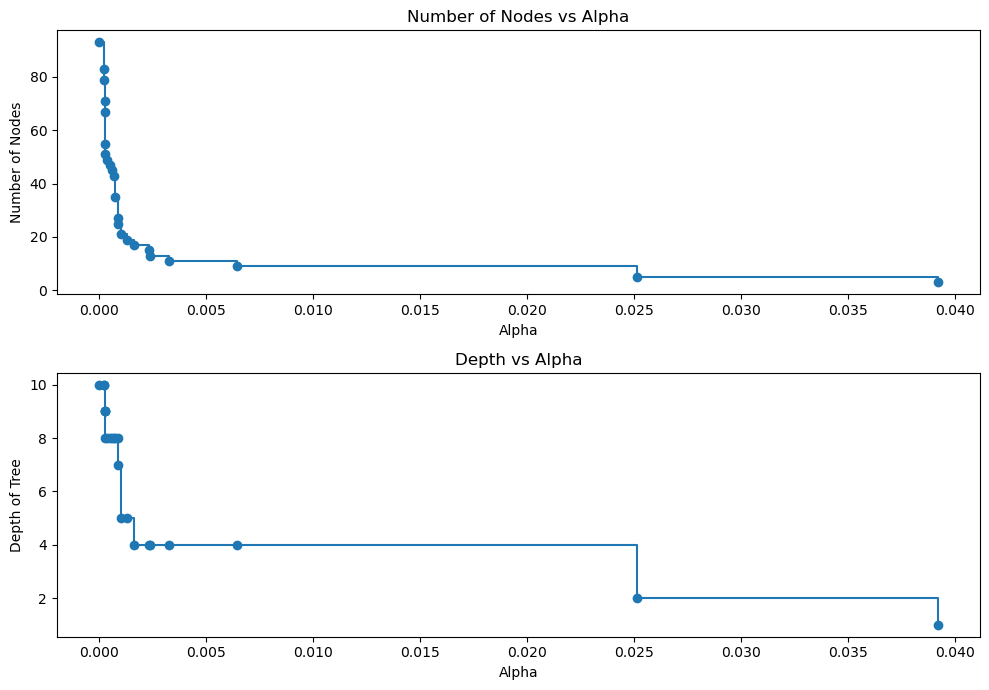

In [130]:
# initialize list to store decision tree models
decision_tree_models = []

# iterate over all alpha values in ccp_alphas
for alpha_value in ccp_alphas:
    # initialize decision tree classifier with the current alpha value
    decision_tree_model = DecisionTreeClassifier(random_state = 1, ccp_alpha = alpha_value)
    
    # fit the decision tree model on training data
    decision_tree_model.fit(X_train, y_train)
    
    # append the trained model to the list
    decision_tree_models.append(decision_tree_model)

# print the number of nodes in the last tree and its corresponding alpha value
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        decision_tree_models[-1].tree_.node_count, ccp_alphas[-1]
    )
)

# remove the last tree and corresponding alpha value for better analysis
decision_tree_models = decision_tree_models[:-1]
ccp_alphas = ccp_alphas[:-1]

# calculate the number of nodes and depth for each model
node_counts = [model.tree_.node_count for model in decision_tree_models]
tree_depths = [model.tree_.max_depth for model in decision_tree_models]

# plot the relationship between alpha and the number of nodes, and between alpha and tree depth
plt.figure(figsize = (10, 7))

# plot number of nodes vs alpha
plt.subplot(2, 1, 1)
plt.plot(ccp_alphas, node_counts, marker = "o", drawstyle = "steps-post")
plt.xlabel("Alpha")
plt.ylabel("Number of Nodes")
plt.title("Number of Nodes vs Alpha")

# plot tree depth vs alpha
plt.subplot(2, 1, 2)
plt.plot(ccp_alphas, tree_depths, marker = "o", drawstyle = "steps-post")
plt.xlabel("Alpha")
plt.ylabel("Depth of Tree")
plt.title("Depth vs Alpha")

plt.tight_layout()  # adjust layout to avoid overlap
plt.show()

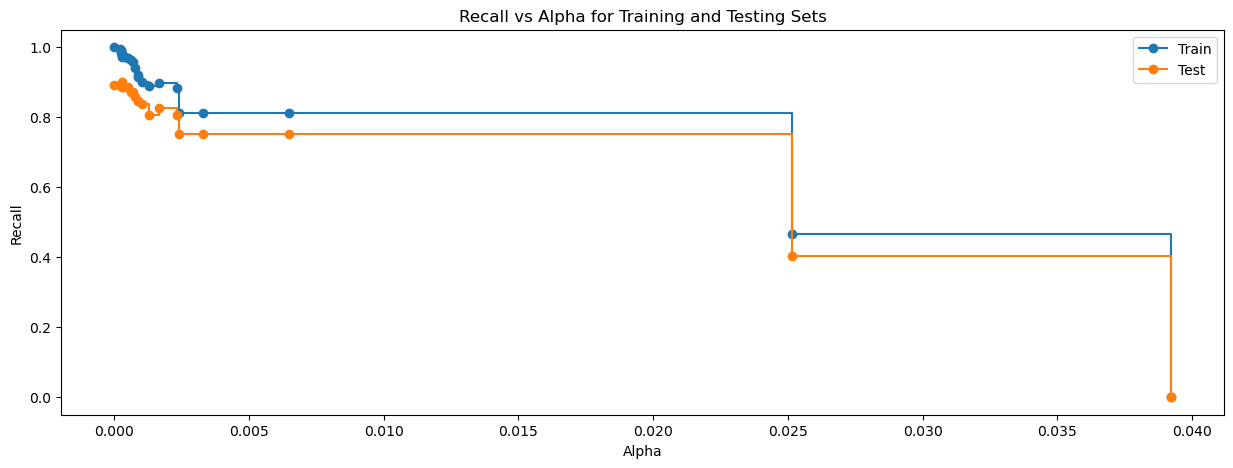

Best Decision Tree Model: DecisionTreeClassifier(ccp_alpha=0.00027210884353741507, random_state=1)


DecisionTreeClassifier(ccp_alpha=0.00027210884353741507,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [132]:
# calculate recall for training set across all models
recall_values_train = []
for model in decision_tree_models:
    predictions_train = model.predict(X_train)  # predict on training data
    recall_score_train = recall_score(y_train, predictions_train)  # calculate recall
    recall_values_train.append(recall_score_train)  # append recall score

# calculate recall for testing set across all models
recall_values_test = []
for model in decision_tree_models:
    predictions_test = model.predict(X_test)  # predict on testing data
    recall_score_test = recall_score(y_test, predictions_test)  # calculate recall
    recall_values_test.append(recall_score_test)  # append recall score

# plot recall vs alpha for training and testing sets
plt.figure(figsize = (15, 5))
plt.plot(ccp_alphas, recall_values_train, marker = "o", label = "Train", drawstyle = "steps-post")
plt.plot(ccp_alphas, recall_values_test, marker = "o", label = "Test", drawstyle = "steps-post")
plt.xlabel("Alpha")
plt.ylabel("Recall")
plt.title("Recall vs Alpha for Training and Testing Sets")
plt.legend()
plt.show()

# identify the best model based on the highest test recall
index_best_model = np.argmax(recall_values_test)  # get index of best model
best_model = decision_tree_models[index_best_model]  # select the best model
print("Best Decision Tree Model:", best_model)

# initialize a new estimator with the best ccp_alpha value and specific class weights
best_ccp_alpha = ccp_alphas[index_best_model]  # get the best ccp_alpha
optimized_estimator = DecisionTreeClassifier(
    ccp_alpha = best_ccp_alpha, 
    class_weight = {0: 0.15, 1: 0.85},  # set class weights
    random_state = 1
)

# fit the optimized estimator to the training data
optimized_estimator.fit(X_train, y_train)

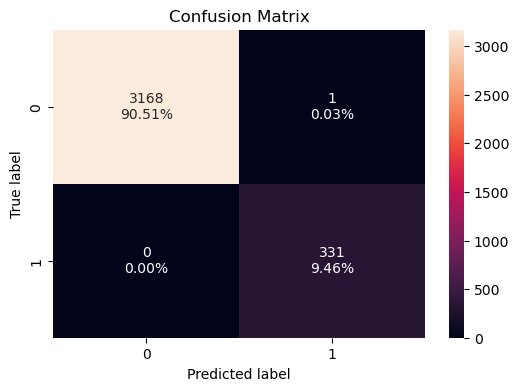

,Accuracy,Recall,Precision,F1
0,0.999714,1.0,0.996988,0.998492


In [134]:
# generate confusion matrix for training data
confusion_matrix_sklearn(optimized_estimator, X_train, y_train)  # plot confusion matrix

# calculate model performance metrics for training data
decision_tree_tuned_post_train = model_performance_classification_sklearn(
    optimized_estimator, X_train, y_train
)  # evaluate performance metrics

# display performance metrics
decision_tree_tuned_post_train

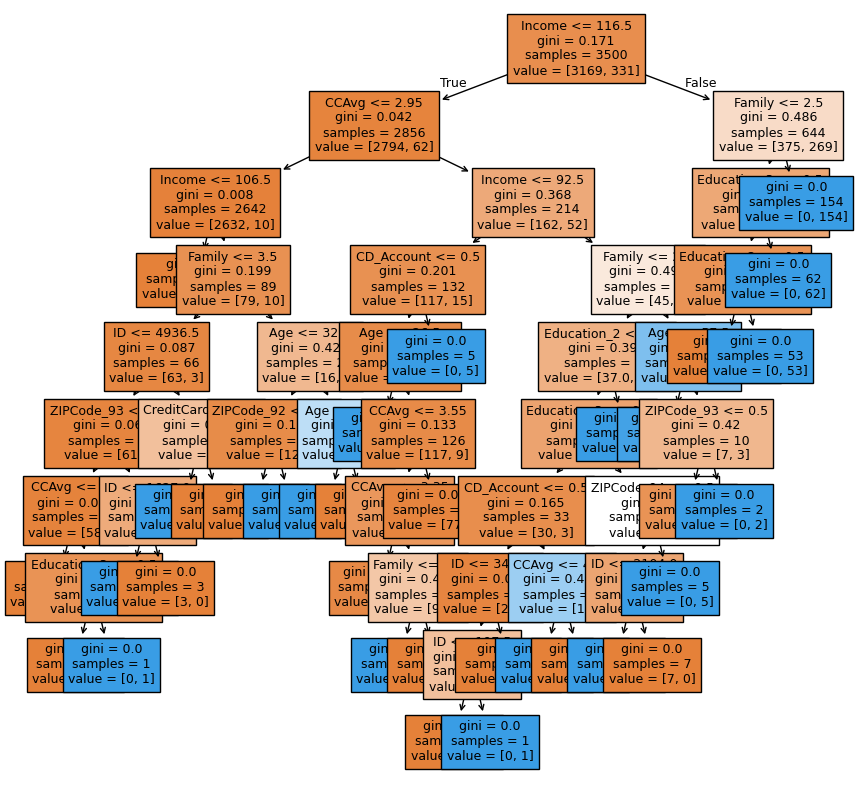

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ID <= 4936.50
|   |   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [51.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |   |--- ID <= 1627.00
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- ID >  1627.00
|   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |--- ID >  4936.50
|   |   |   |   |   |--- CreditCard <= 0.50
|  

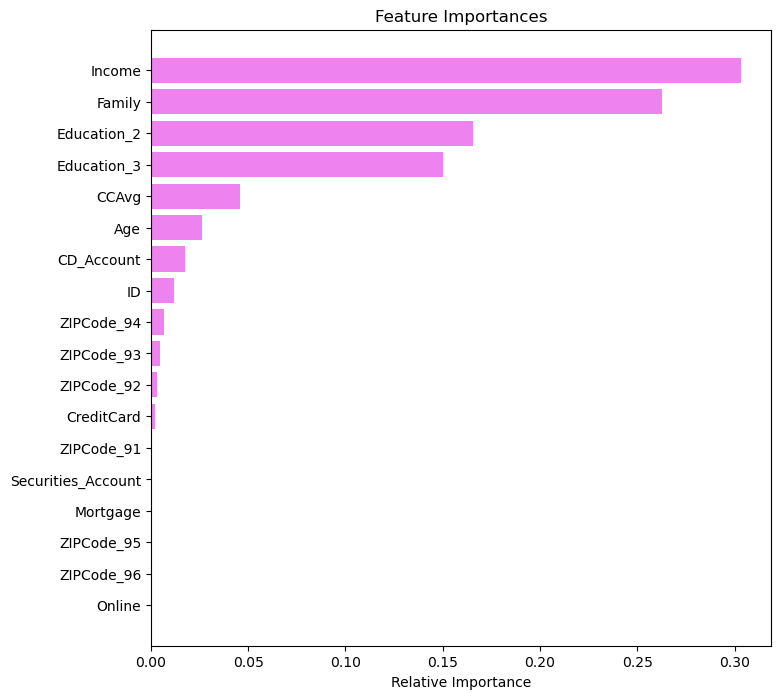

In [136]:
# visualize decision tree structure
plt.figure(figsize=(10, 10))  # set figure size for decision tree visualization
out = tree.plot_tree(
    best_model,  # use the optimized decision tree model (previously 'estimator_2')
    feature_names=feature_names,  # specify feature names for better interpretation
    filled=True,  # fill nodes with color based on class
    fontsize=9,  # set font size
    node_ids=False,  # do not show node IDs
    class_names=None,  # do not display class names
)  
# add arrows to decision tree splits if missing
for node in out:
    arrow = node.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")  # set edge color of arrow
        arrow.set_linewidth(1)  # set arrow line width
plt.show()  # display the decision tree visualization

# text report showing decision tree rules
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))  # print decision rules

# compute feature importance
feature_importance_df = pd.DataFrame(
    best_model.feature_importances_, columns=["Importance"], index=X_train.columns
).sort_values(by="Importance", ascending=False)  # create dataframe for feature importances
print(feature_importance_df)  # print feature importances

# plot feature importance
importances = best_model.feature_importances_  # extract feature importances
indices = np.argsort(importances)  # get sorted indices of feature importances

plt.figure(figsize=(8, 8))  # set figure size for feature importance plot
plt.title("Feature Importances")  # set title
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")  # horizontal bar plot
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])  # add y-axis labels
plt.xlabel("Relative Importance")  # label x-axis
plt.show()  # display the feature importance plot


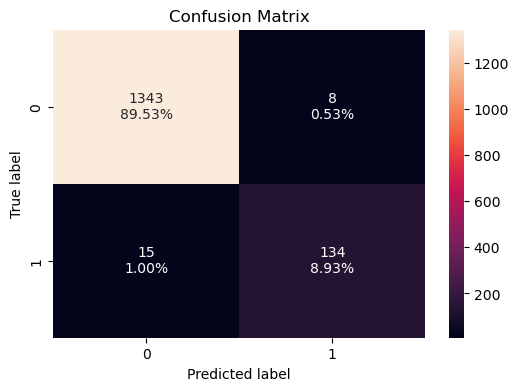

,Accuracy,Recall,Precision,F1
0,0.984667,0.899329,0.943662,0.920962


In [138]:
# create confusion matrix for test data
confusion_matrix_sklearn(
    best_model,  # use the trained and optimized decision tree model
    X_test,  # input test features
    y_test  # actual target values for the test set
)

# evaluate model performance on test data
decision_tree_tune_post_test = model_performance_classification_sklearn(
    best_model,  # use the trained and optimized decision tree model
    X_test,  # input test features
    y_test  # actual target values for the test set
)

# display model performance metrics
decision_tree_tune_post_test

## Model Performance Comparison and Final Model Selection

In [159]:
# compare training performance of different models
models_train_comparison = pd.concat(
    [
        tuned_decision_tree_perf_train.T,  # default decision tree model performance
        tuned_decision_tree_perf_train.T,  # performance of pre-pruned decision tree
        decision_tree_tuned_post_train.T,  # performance of post-pruned decision tree
    ],
    axis=1,  # concatenate along columns
)

# rename columns for better clarity
models_train_comparison.columns = [
    "Decision Tree (Default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

# display training performance comparison
print("Comparison of training performance:")
print(models_train_comparison)

# compare testing performance of different models
models_test_comparison = pd.concat(
    [
        decision_tree_perf_test.T,  # default decision tree model performance
        decision_tree_tuned_performance_test.T,  # performance of pre-pruned decision tree
        decision_tree_tune_post_test.T,  # performance of post-pruned decision tree
    ],
    axis=1,  # concatenate along columns
)

# rename columns for better clarity
models_test_comparison.columns = [
    "Decision Tree (Default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

# display testing performance comparison
print("Comparison of testing performance:")
print(models_test_comparison)

Comparison of training performance:
           Decision Tree (Default)  Decision Tree (Pre-Pruning)  \
Accuracy                  0.790286                     0.790286   
Recall                    1.000000                     1.000000   
Precision                 0.310798                     0.310798   
F1                        0.474212                     0.474212   

           Decision Tree (Post-Pruning)  
Accuracy                       0.999714  
Recall                         1.000000  
Precision                      0.996988  
F1                             0.998492  
Comparison of testing performance:
           Decision Tree (Default)  Decision Tree (Pre-Pruning)  \
Accuracy                  0.983333                     0.779333   
Recall                    0.892617                     1.000000   
Precision                 0.936620                     0.310417   
F1                        0.914089                     0.473768   

           Decision Tree (Post-Pruning)  
Accur

## Actionable Insights and Business Recommendations


The decision tree analysis identified key factors influencing personal loan acceptance, including income, family size, education levels, and credit card spending. Higher income and larger family size strongly correlate with loan acceptance, suggesting the need to target individuals with greater disposable income and families with tailored benefits like funding for education or home improvements. Customers with higher education levels, especially graduate and professional degrees, are more likely to accept loans, highlighting the importance of targeting educated professionals. Additionally, high credit card spending (CCAvg) is indicative of customers who are accustomed to managing credit and are potential candidates for loans.

The model evaluation showed that the post-pruned decision tree outperformed other models, achieving a good balance between precision, recall, and generalizability. This model should be used for predicting loan acceptance to reduce false negatives and ensure efficient targeting. For the current campaign, the marketing team should focus on segmenting the audience based on income, education, and family size, designing personalized messaging that emphasizes the benefits of loans for specific demographics. Customers with high credit card spending should also be prioritized, with exclusive offers and cross-selling strategies to increase loan uptake. Testing the campaign on a smaller sample before scaling up will help refine targeting and messaging.

For future campaigns, the business should enhance data collection by including factors like employment sector, debt-to-income ratio, and savings account balances for better profiling. Expanding digital marketing efforts, such as email campaigns and social media ads, will allow precise targeting of high-value customers. Additionally, simplifying the loan application process and offering pre-approved loans for qualified individuals can increase conversion rates. Regularly reviewing campaign performance and exploring advanced predictive models like random forests or gradient boosting will ensure adaptability to market changes. By leveraging these insights, the marketing team can optimize campaign effectiveness, allocate resources efficiently, and build stronger customer relationships.

___